In [1]:
from pytorch_fast_elmo import FastElmo, batch_to_char_ids
import sys
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy
import matplotlib.pyplot as plt
import random
import model
import torch

In [2]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

def plot_hierarchically(vecs, vecs2, labels):
        
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(wspace=0, hspace=0)
    set_size(40,5)
    Z = linkage(vecs, optimal_ordering  = False, method = "ward")
    order = scipy.cluster.hierarchy.leaves_list(Z)
    labels_with_indices = zip(labels, order)
    labels_with_indices = sorted(labels_with_indices, key = lambda tup: tup[1])
    labels_sorted, _ = list(zip(*labels_with_indices))
    #plt.figure()
    dendrogram(Z, labels = labels_sorted, leaf_font_size = 25, orientation = "top", color_threshold = 0)  
    #plt.show()

    plt.subplot(1, 2, 2)
    set_size(40,5)
    Z = linkage(vecs2, optimal_ordering  = False, method = "ward")
    order = scipy.cluster.hierarchy.leaves_list(Z)
    labels_with_indices = zip(labels, order)
    labels_with_indices = sorted(labels_with_indices, key = lambda tup: tup[1])
    labels_sorted, _ = list(zip(*labels_with_indices))
    #plt.figure()
    dendrogram(Z, labels = labels_sorted, leaf_font_size = 25, orientation = "top", color_threshold = 0)  
    plt.show()
    
def load_sents(fname = "sents_f", max_length = None):
    
    with open(fname, "r") as f:
              
        lines = f.readlines()
    
    lines =  [line.strip().split(" ") for line in lines]
    if max_length is not None:
        lines = list(filter(lambda sentence: len(sentence) < max_length, lines))
    return lines

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)
    
def load_model(name = "model.pt"):
    net = model.SiameseNet()
    net.load_state_dict(torch.load(name))
    net.eval()
    return net

def transform(vec, model):
    
    return model._represent(vec).detach().numpy()

Load pretrained ELMO and a collection of Wikipedia sentences.

In [3]:
all_sentences = load_sents(max_length = 15)
options_file = 'elmo_2x4096_512_2048cnn_2xhighway_options.json'
weight_file = 'elmo_2x4096_512_2048cnn_2xhighway_weights.hdf5'
elmo = FastElmo(options_file, weight_file)

collect ELMO states over a collection of sentences.

In [4]:
num_sentences = 60
random.seed(0)
random.shuffle(all_sentences)
sentences = all_sentences[:num_sentences] # load random sentences from wikipedia
character_ids = batch_to_char_ids(sentences)
embeddings = elmo(character_ids) # collect elmo states
network = load_model()

perform hierarchical clustering on a sample of sentences.

the swedish team , of which he was a member , placed 6th .


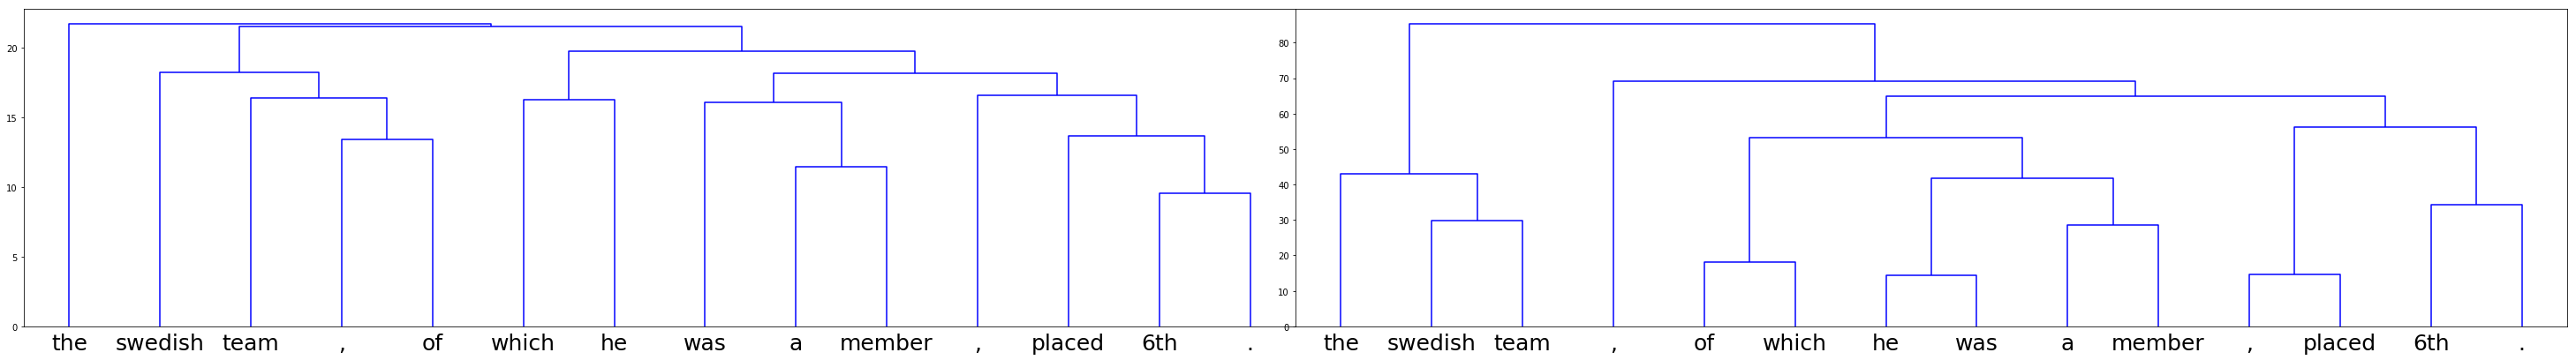

anyone has been , and still is , welcome to fix the article .


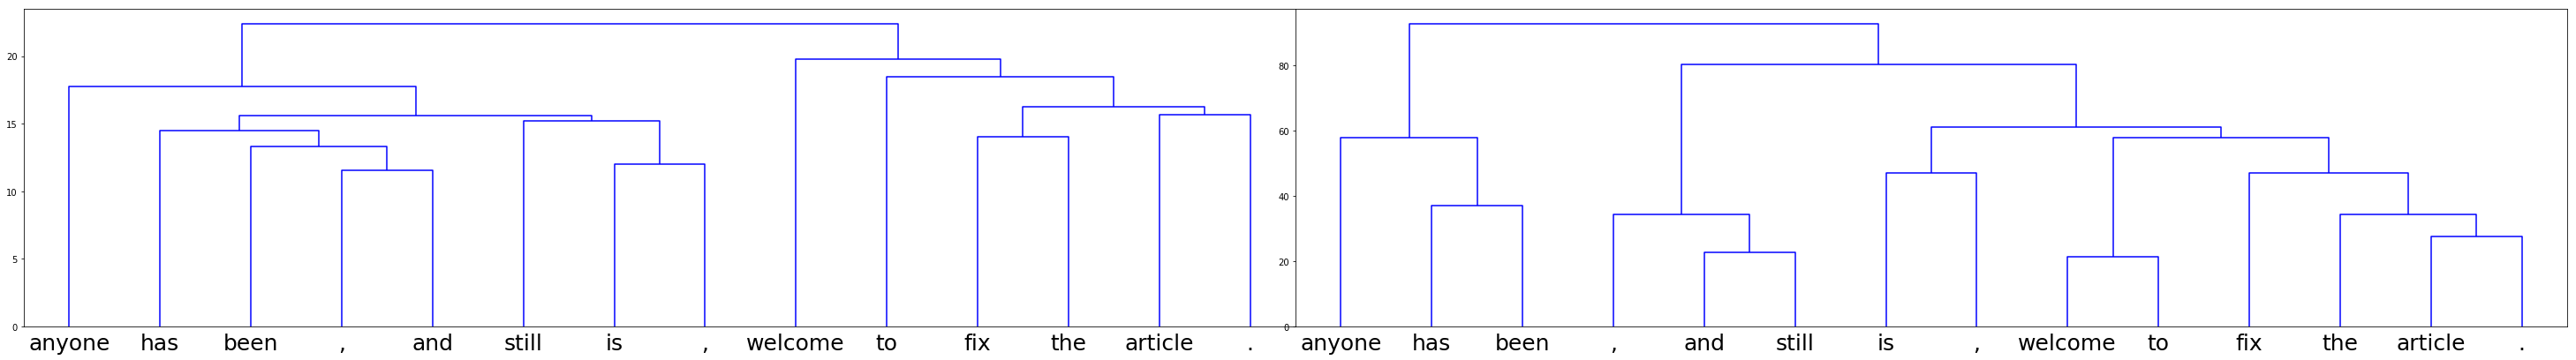

born in hamilton , ferguson has been a keen rangers fan since childhood .


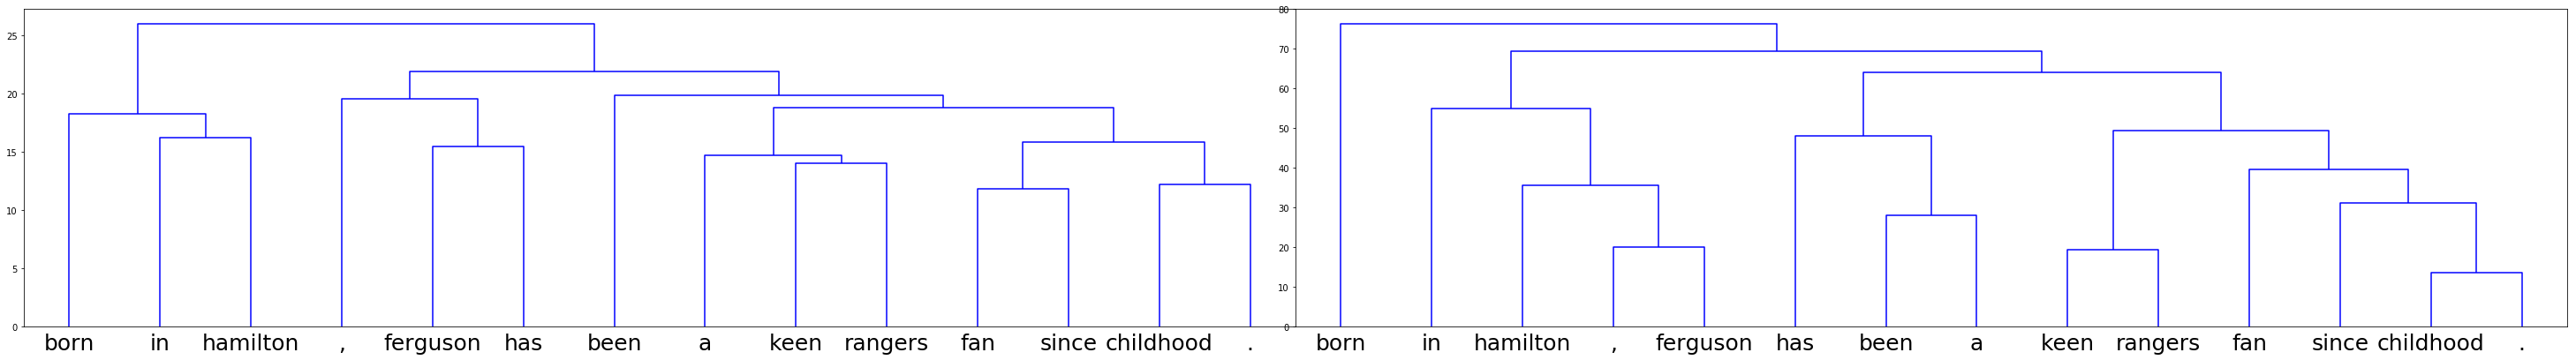

its engines were fairly economical but offered little in the way of performance .


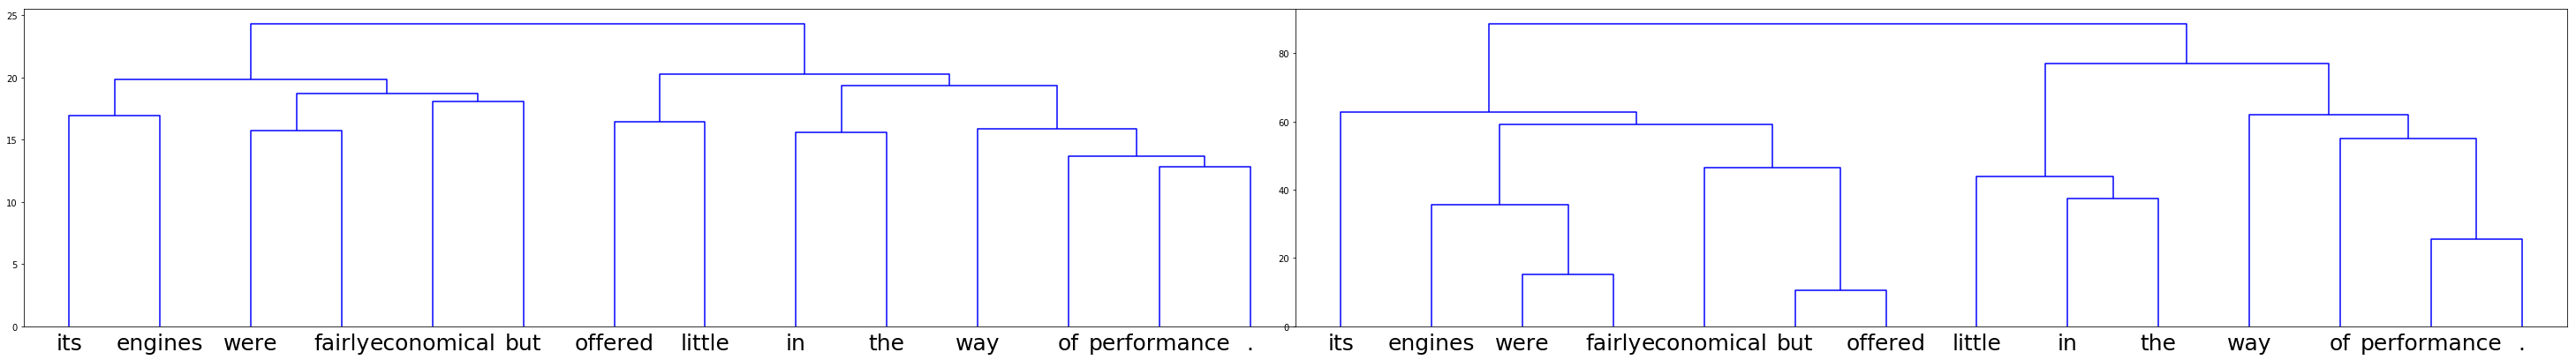

i only use 20 mb of the 750 mb available on the cd .


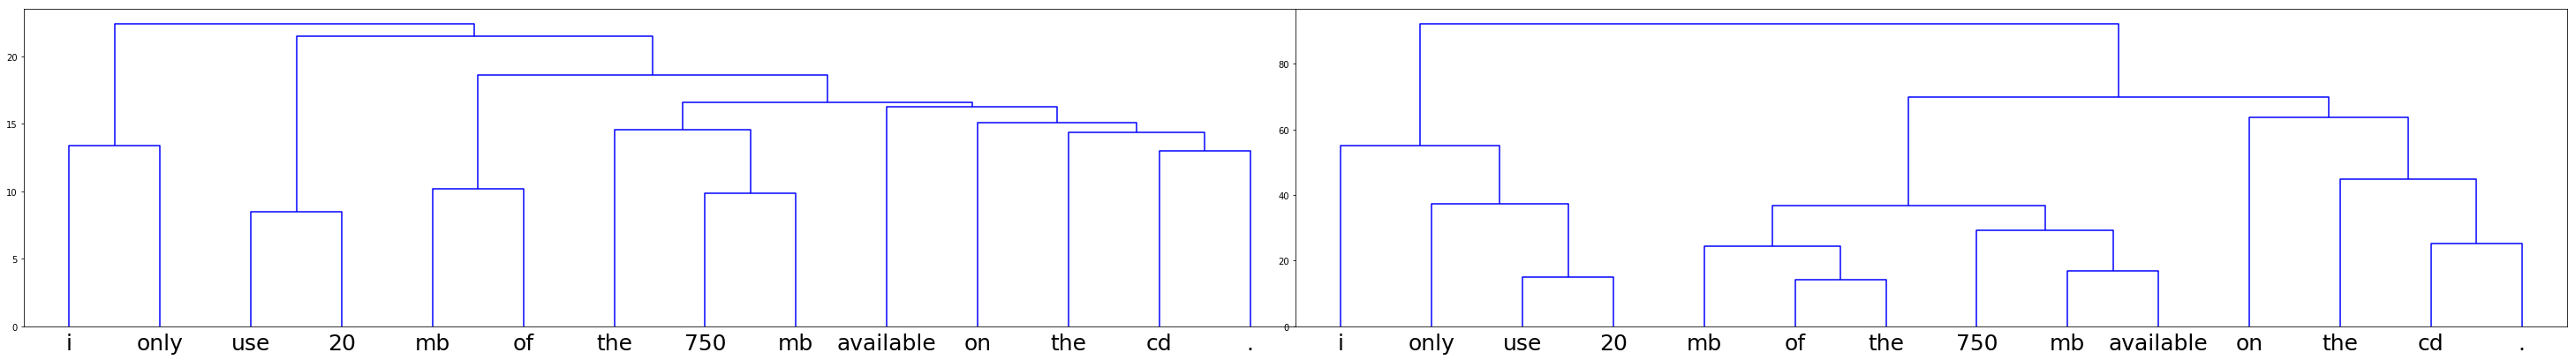

sutherland became the pitt coach in 1924 , where he remained through 1938 .


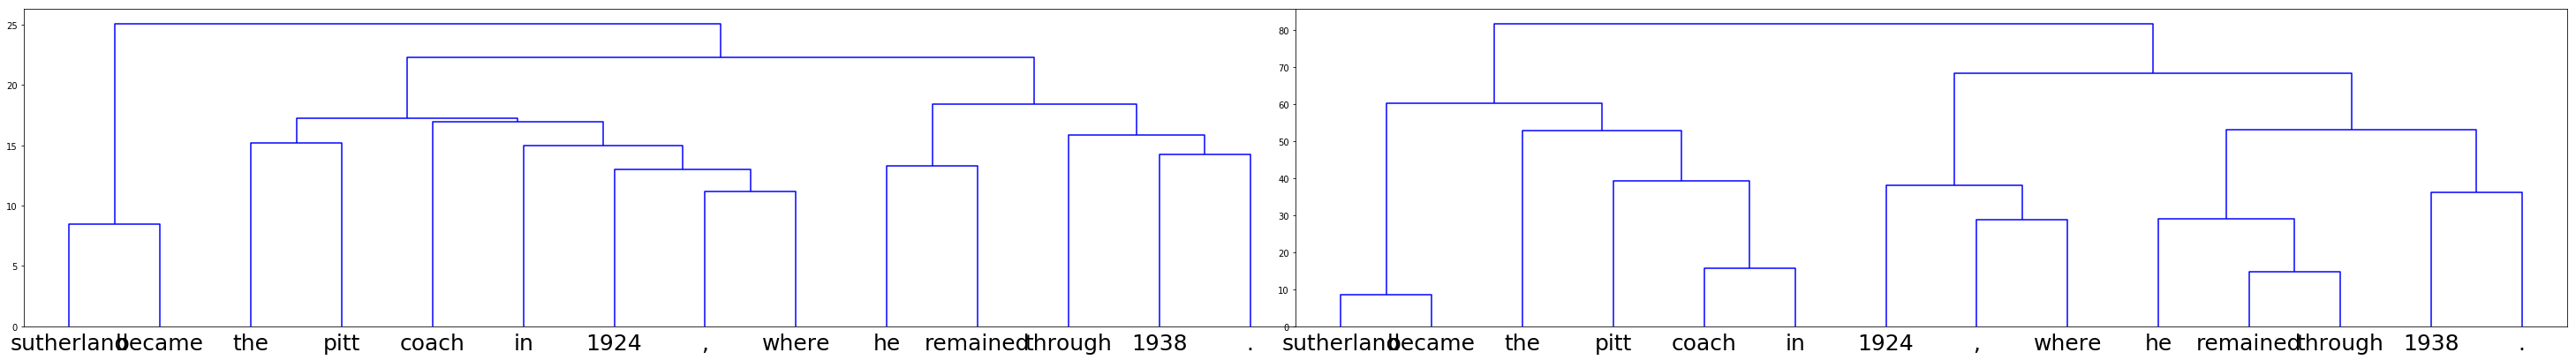

it looks like attempts have been made to address all of his concerns .


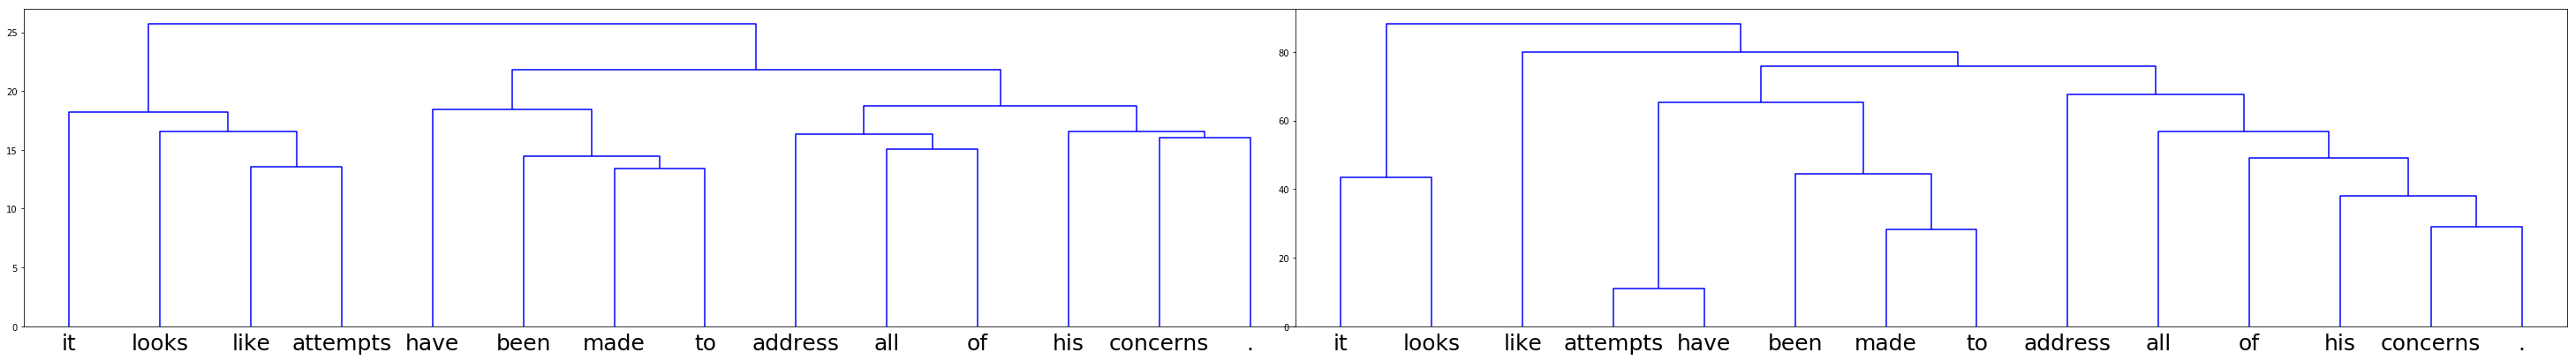

japanese name for 1949 , when many of these artists were born ) .


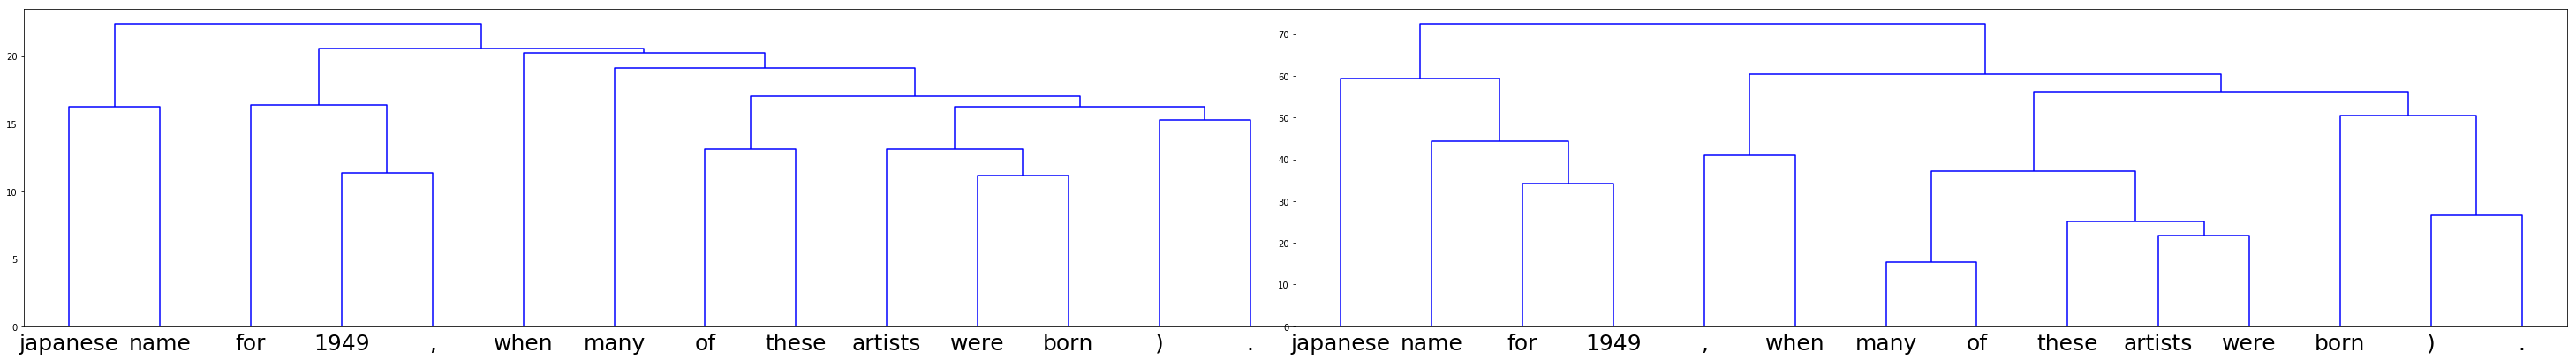

in july of the same year , he was elevated to chief justice .


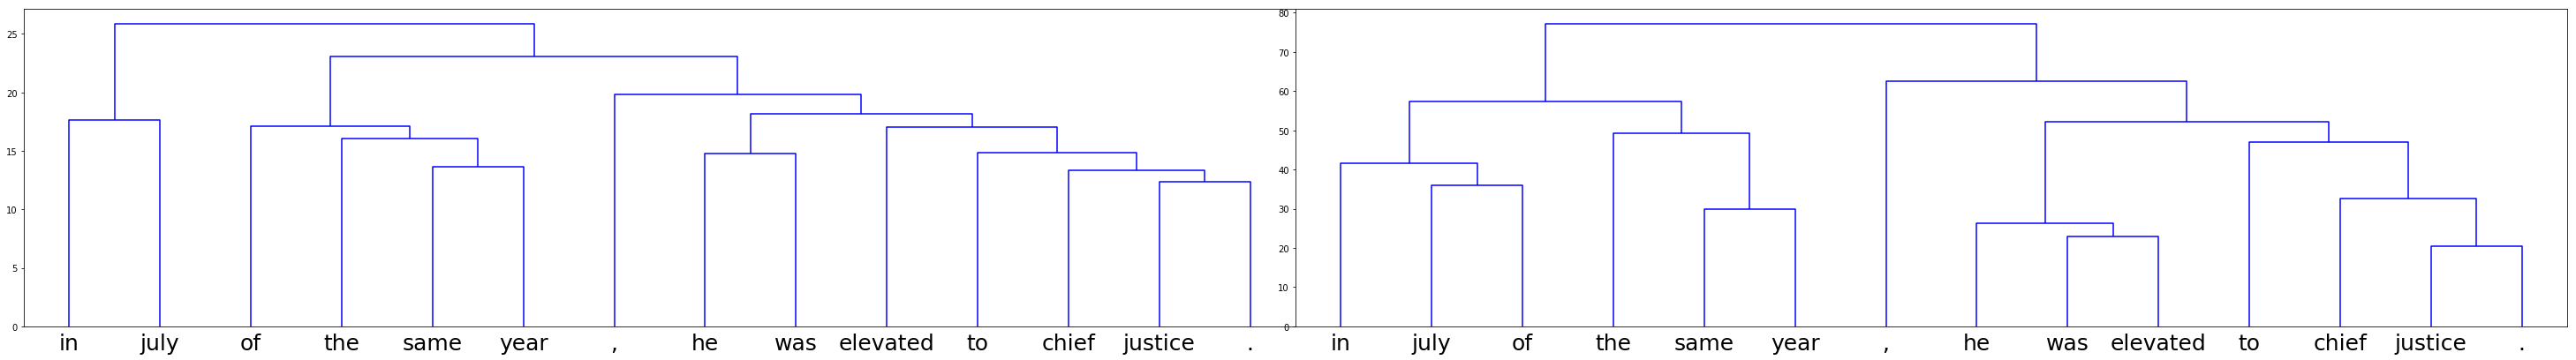

seven sisters ( queensland ) ( talk ) unassessed-class ( no-class ) added .


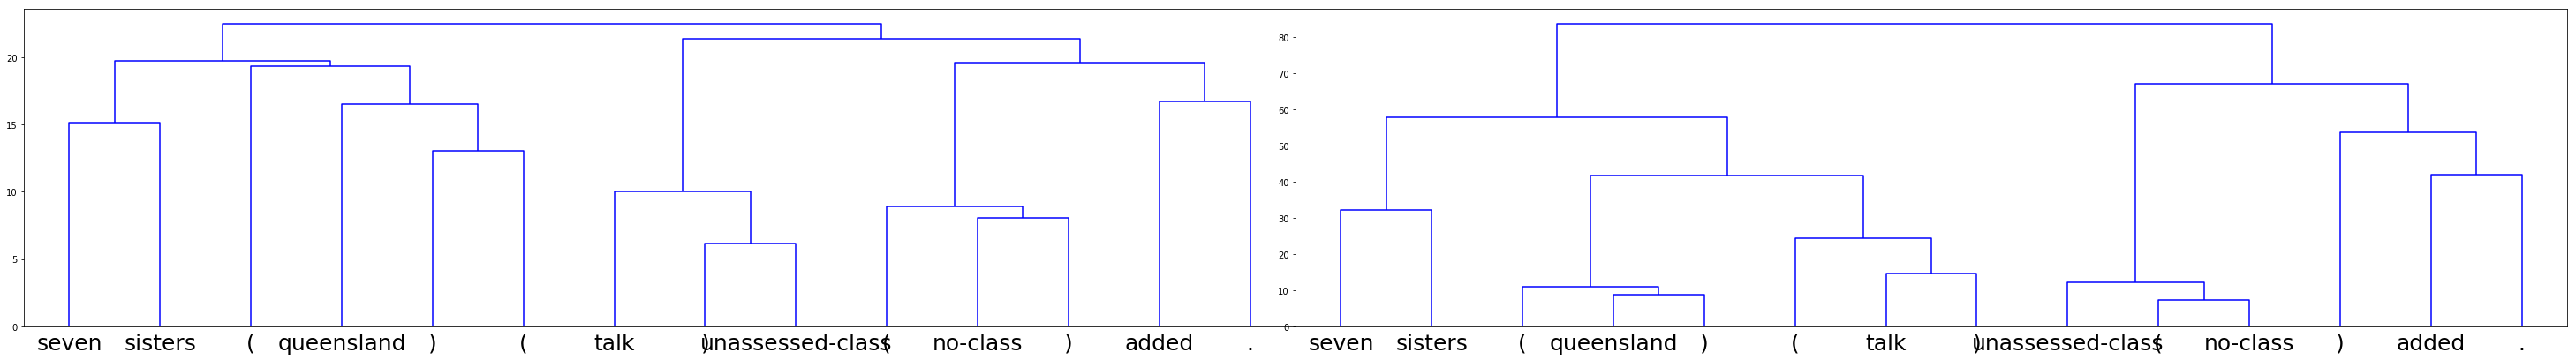

the students are divided into four houses upon their intake in the college .


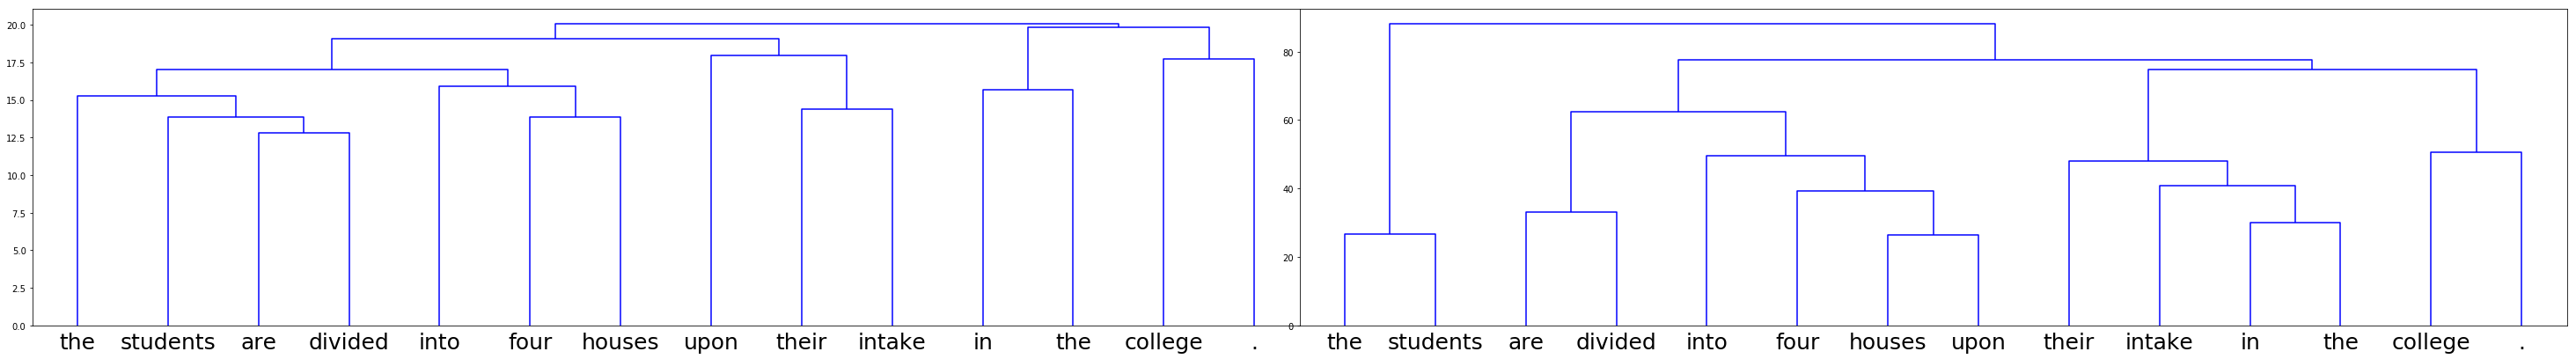

at the 2006 census , its population was 157 , in 37 families .


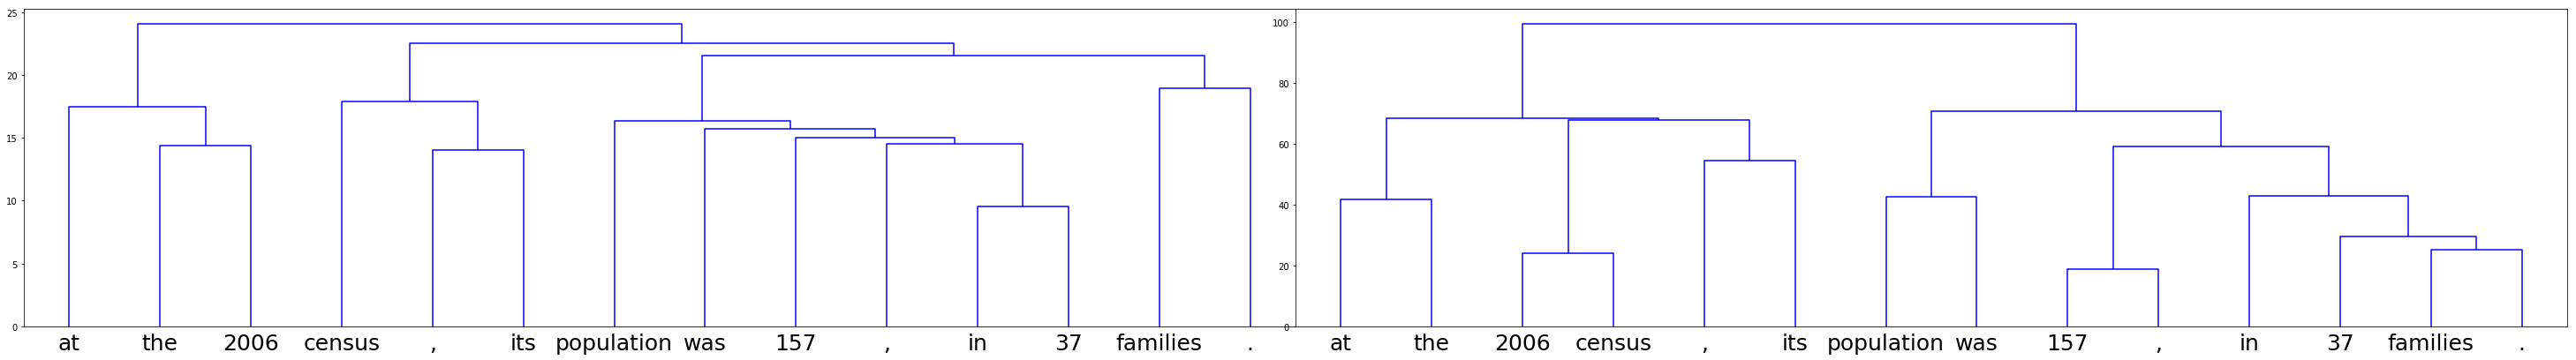

allows for a systematic evaluation of all potential projects at the same time .


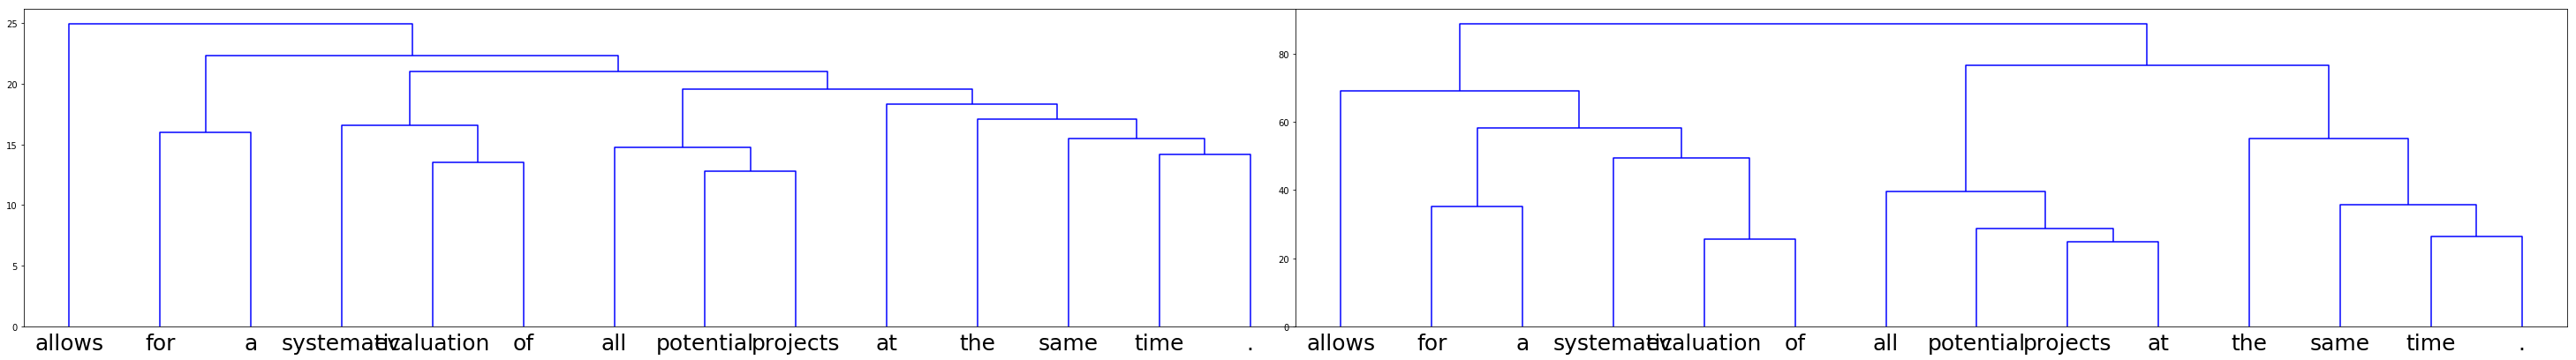

the final decision was taken on the uefa meeting on 13 may 2009 .


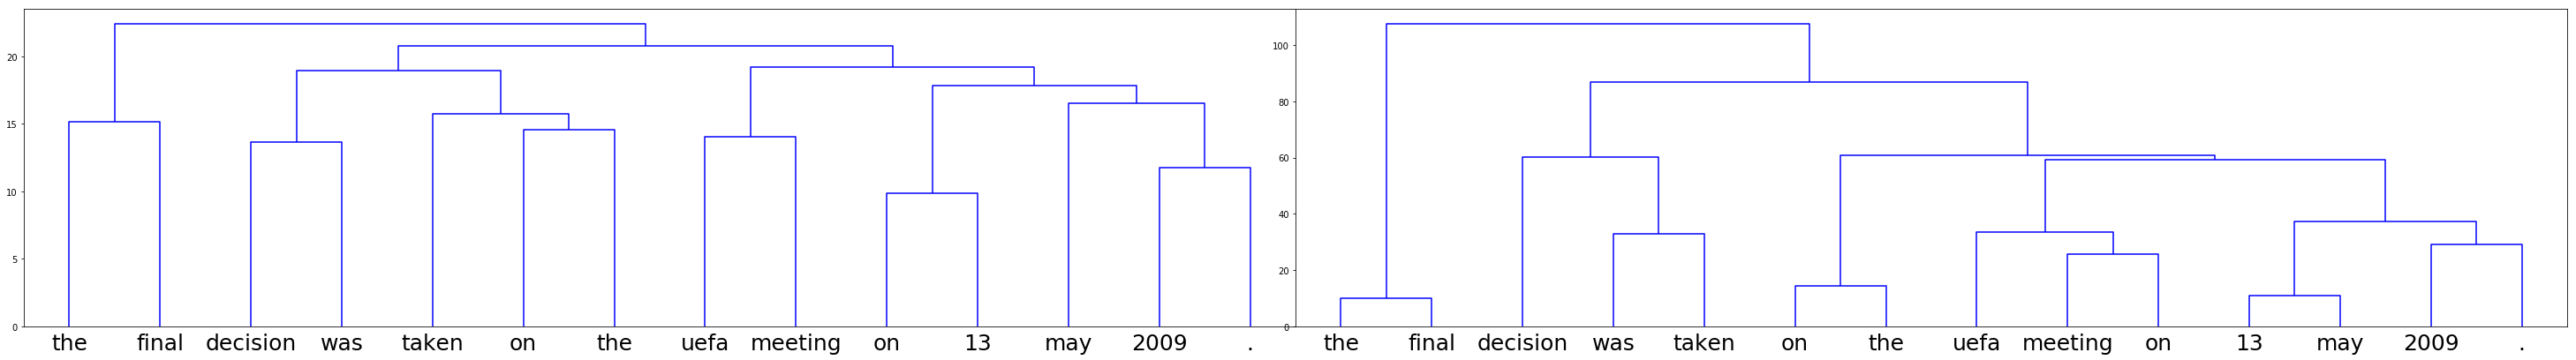

dayton ducks of the middle atlantic league during part of the 1941 season .


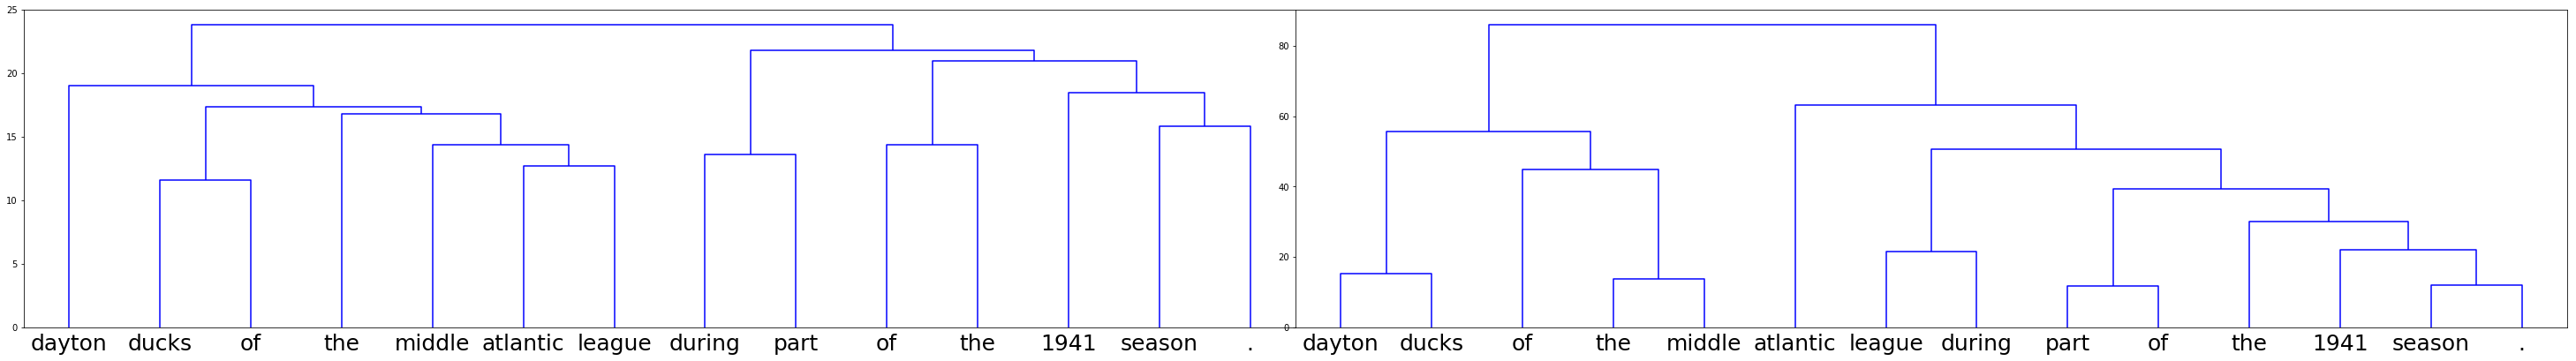

on friday , students attend all six classes for roughly 50 minutes each .


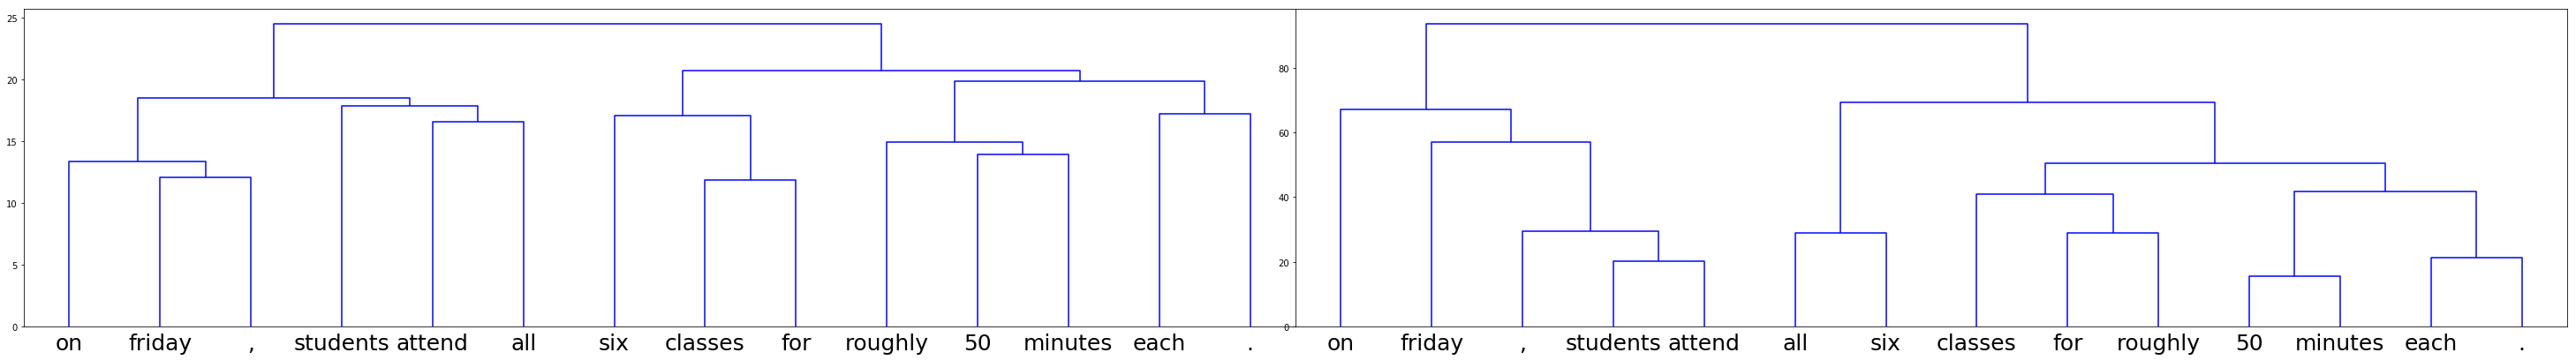

by the late 1990s , the popularity of this genre was in decline .


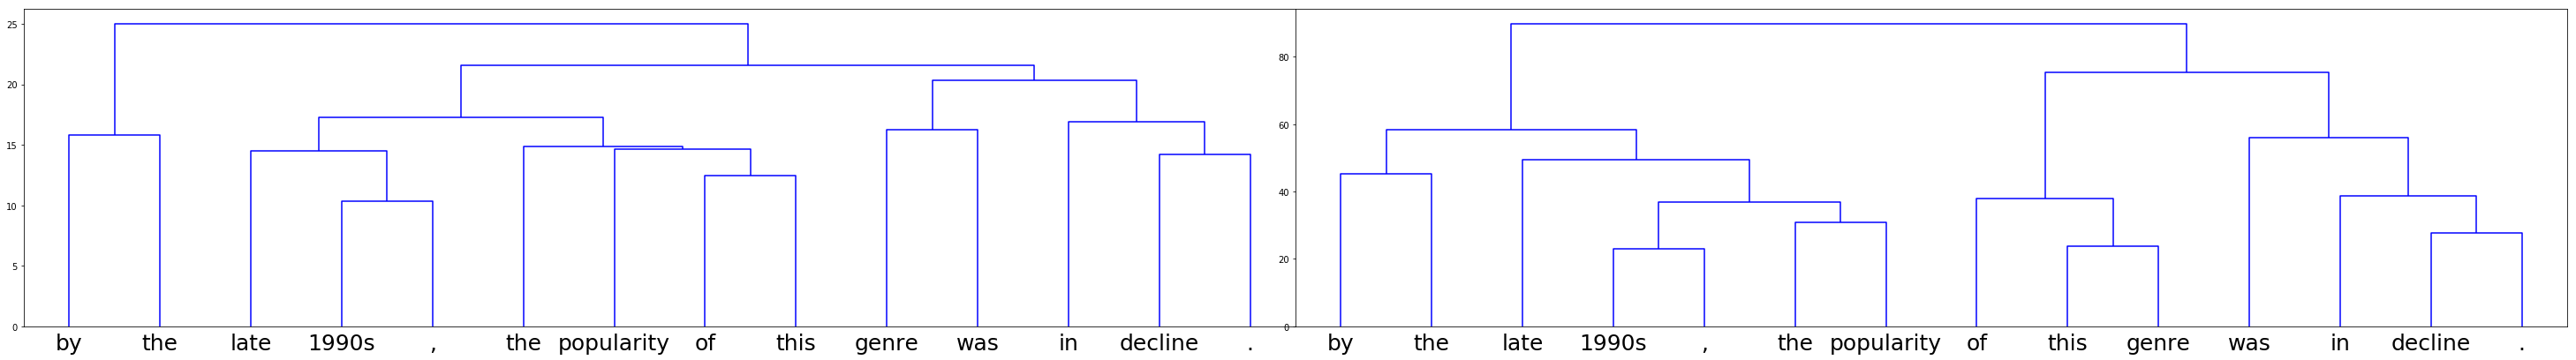

moreover , i have every right to claim that you are attacking me .


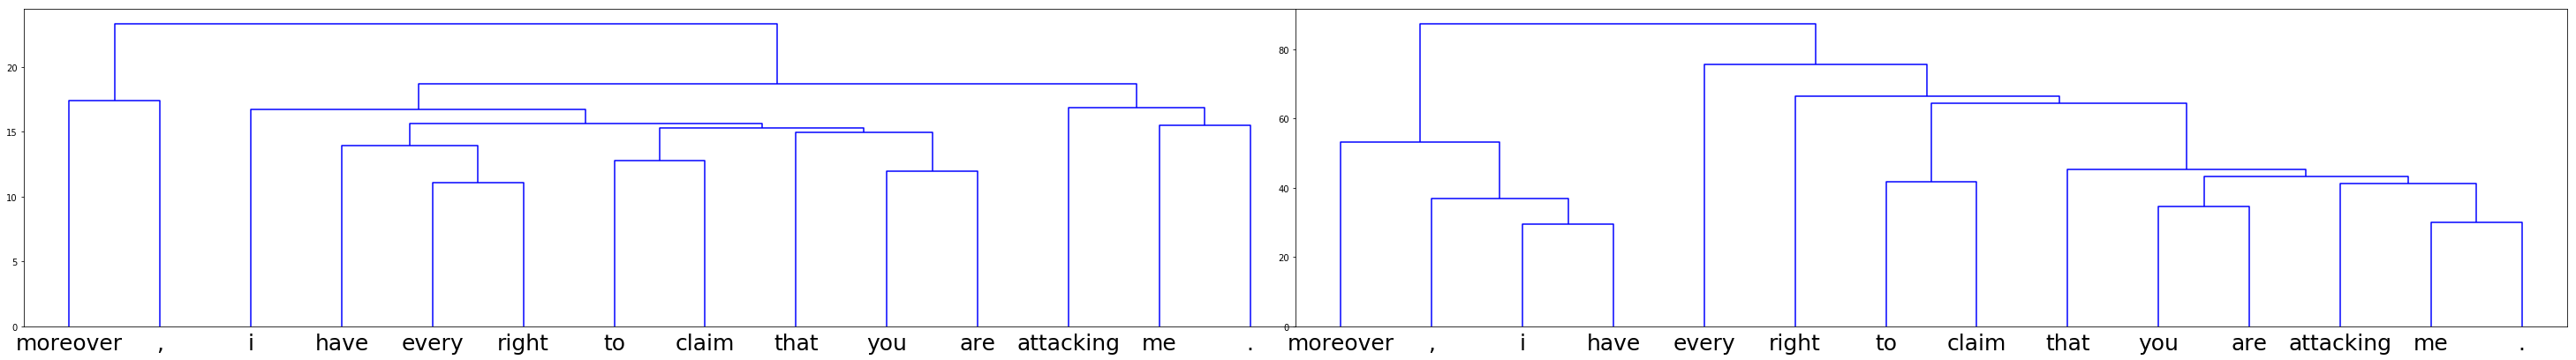

the four fourth round matches were scheduled for saturday , 9 march 1907 .


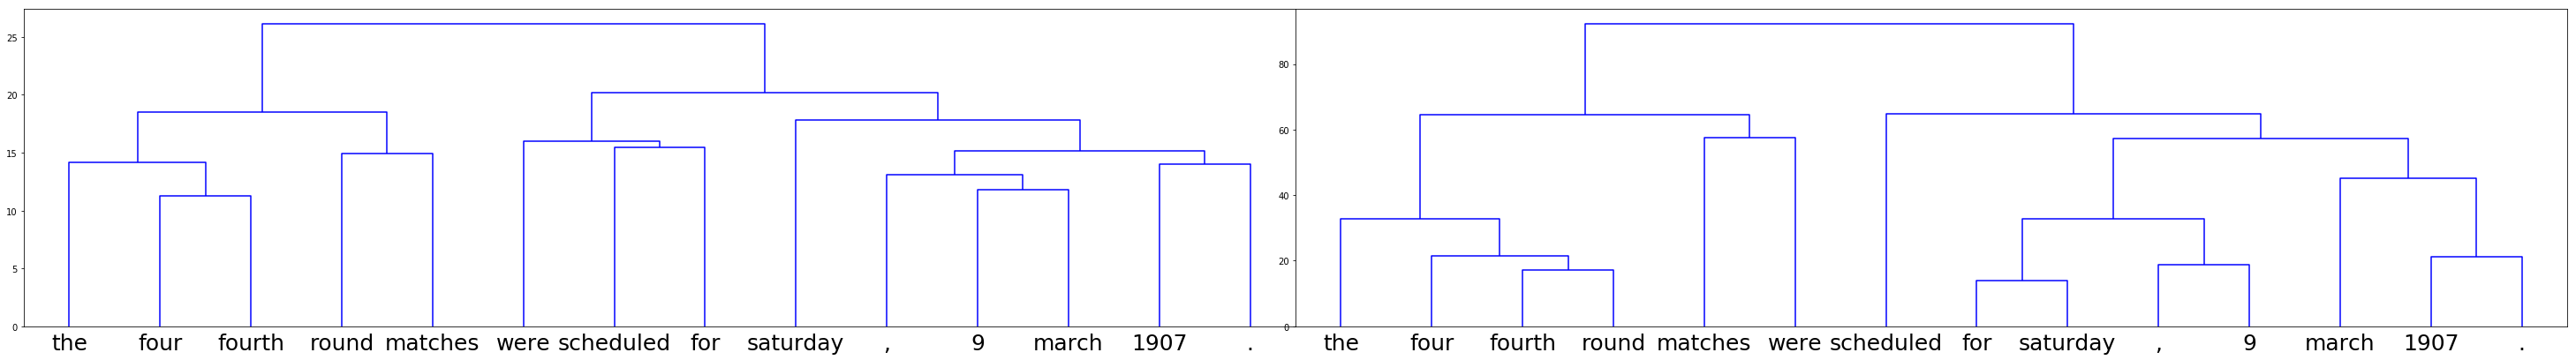

flagged protection is far too weak , and largely a waste of time .


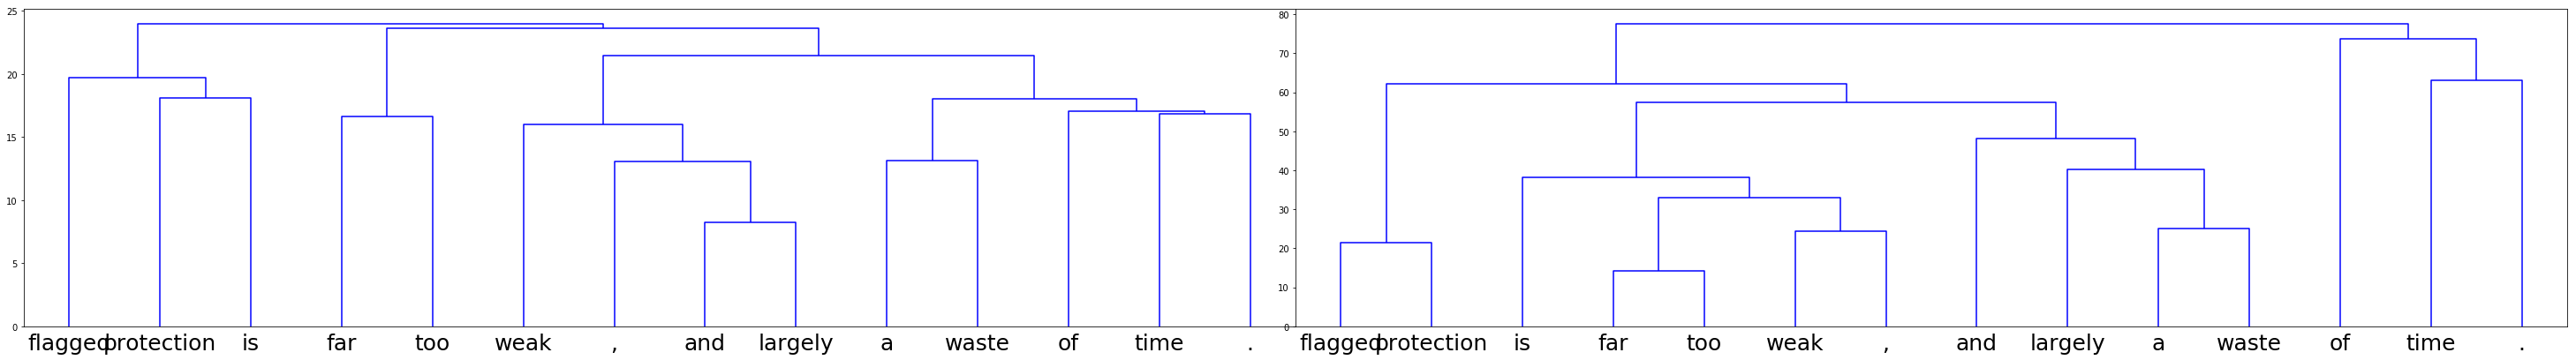

welding allows a large sculpture to be cast in pieces , then joined .


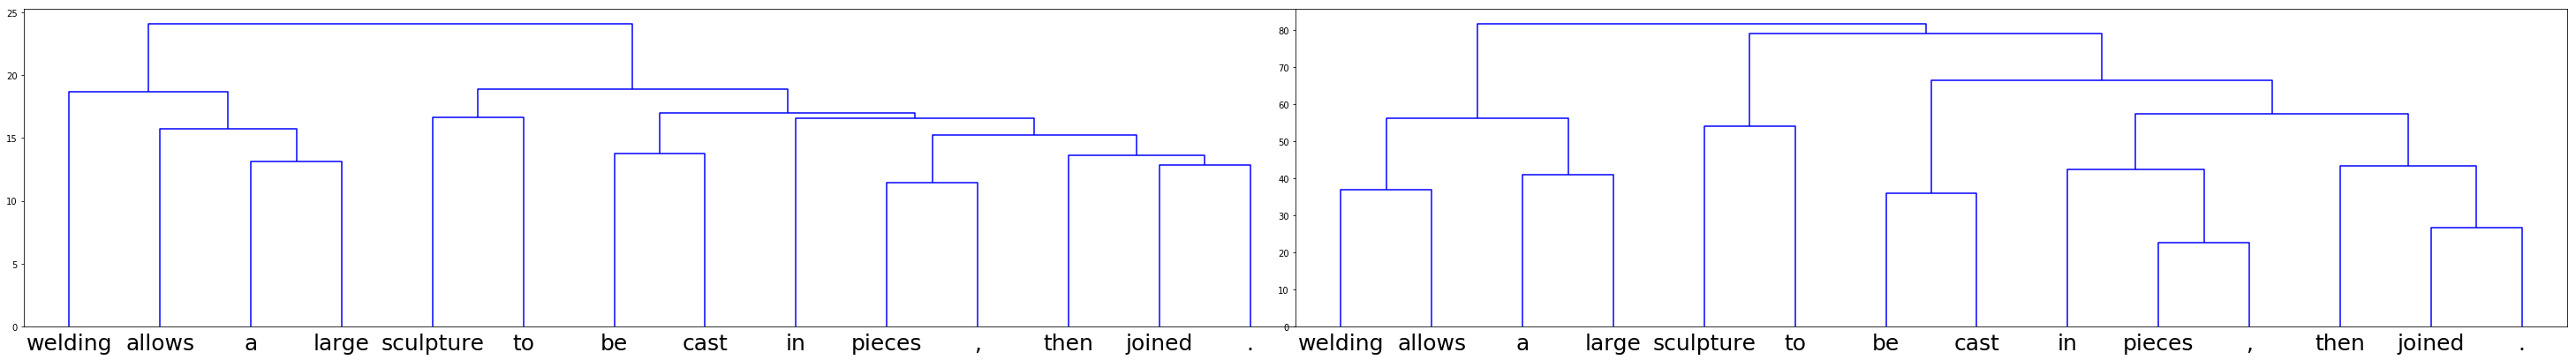

reconnaissance squadron ( very long range , photographic ) on 17 december 1945 .


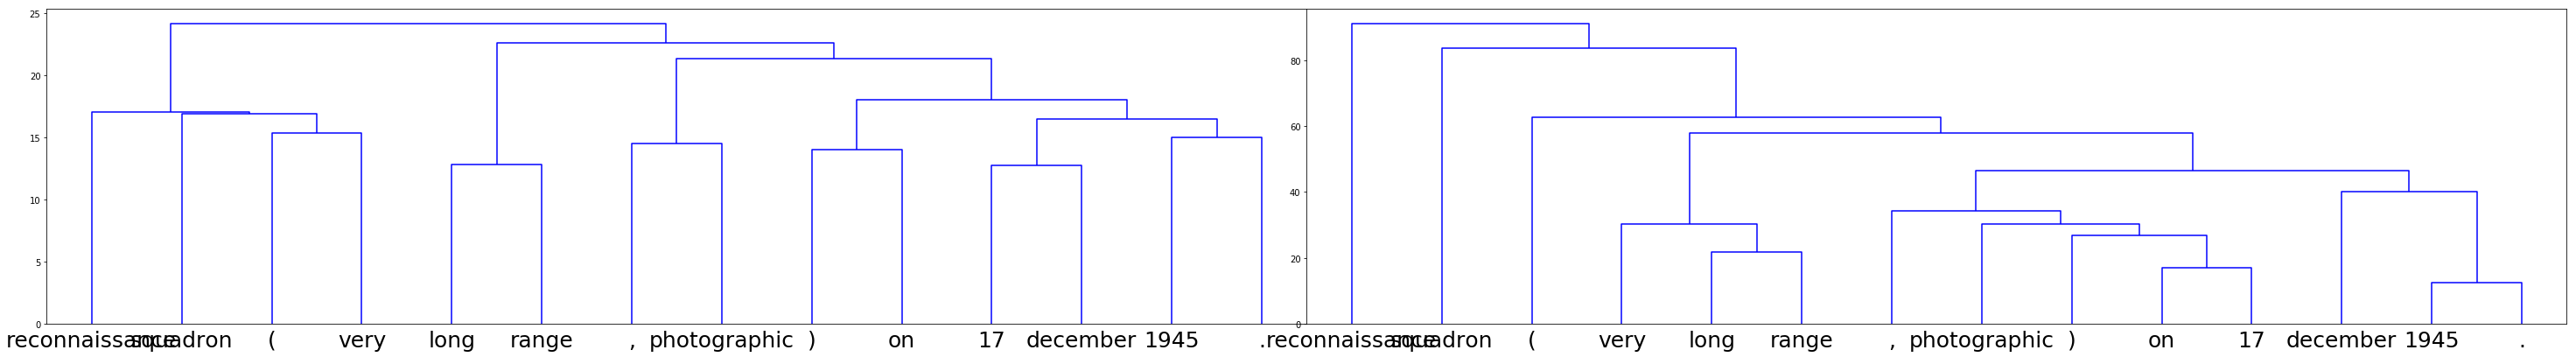

looks like it was split from censorship with just brazil and venezuela ( !


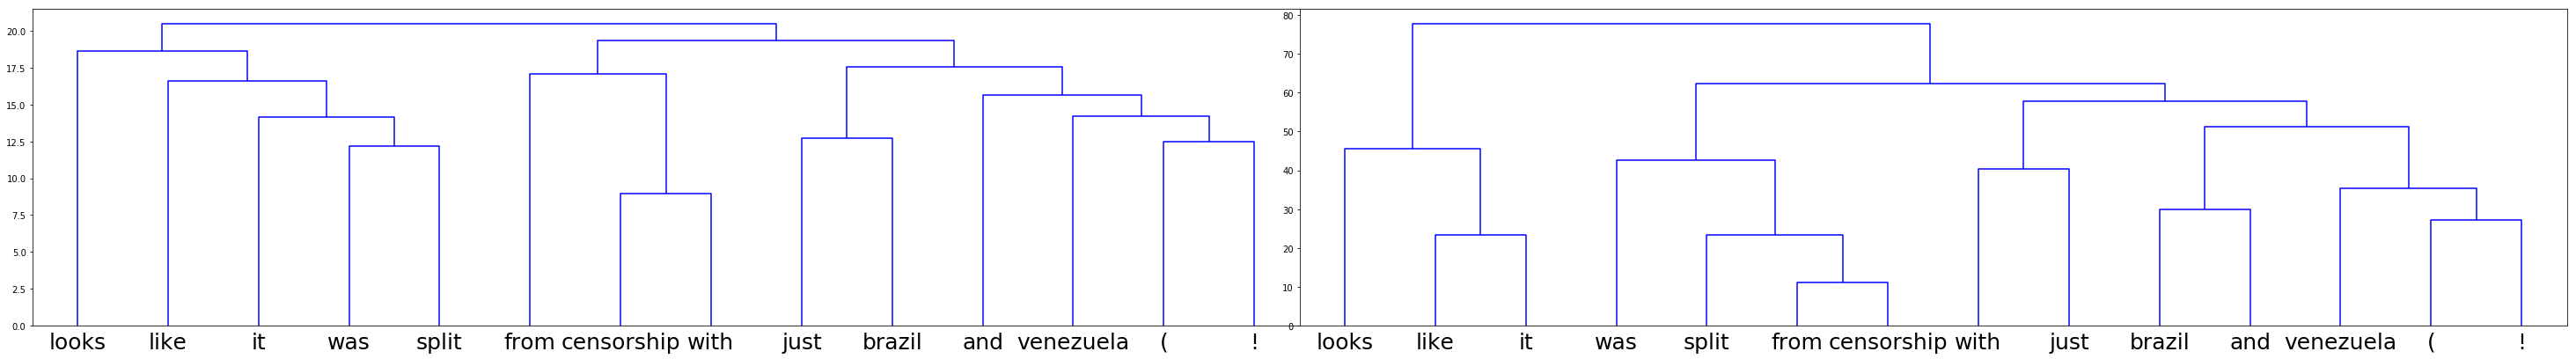

delete all per nom and per the other discussions on this precise topic .


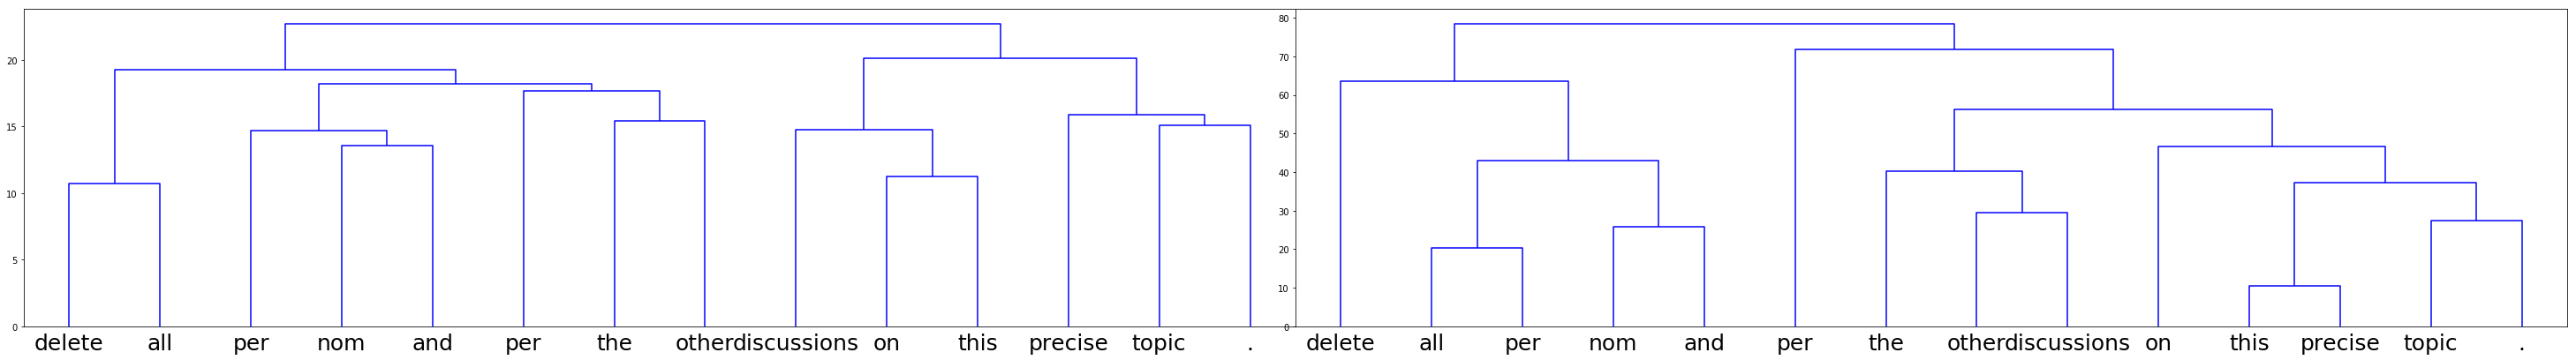

celebrated performers from within the country and abroad set the stage on fire .


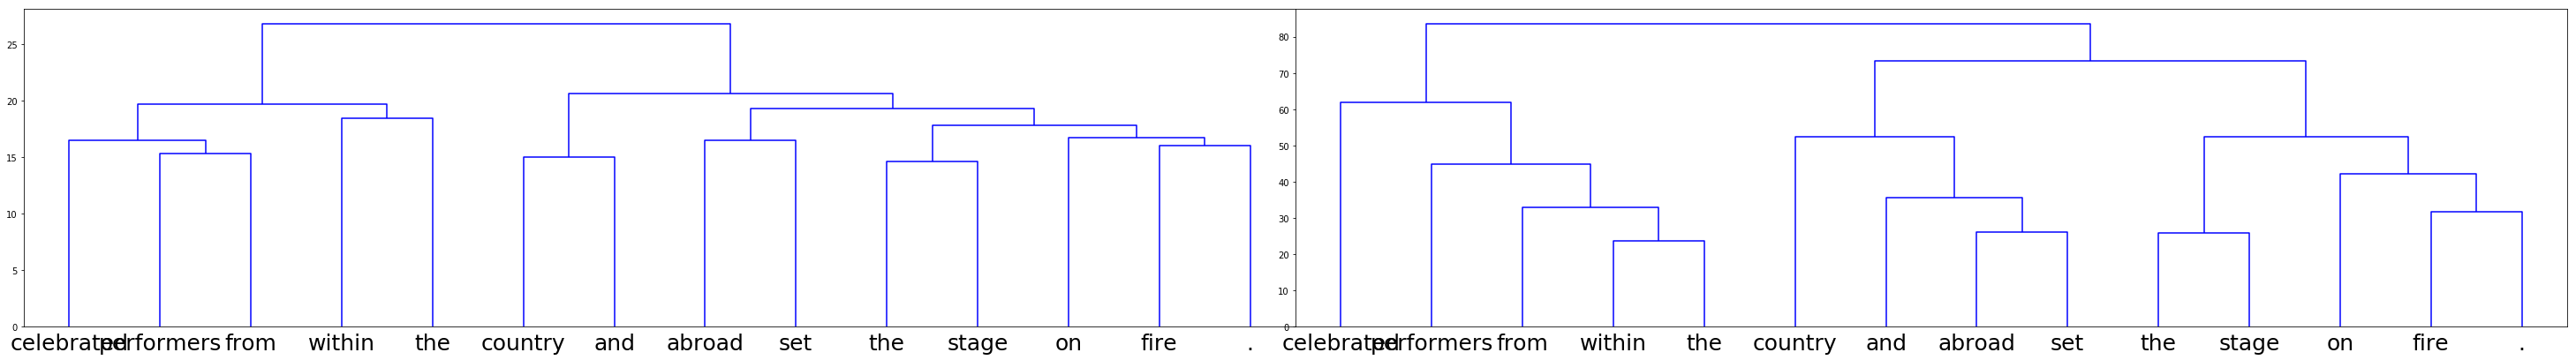

its duration was 90 minutes and its premiere occurred on 1 december 2002 .


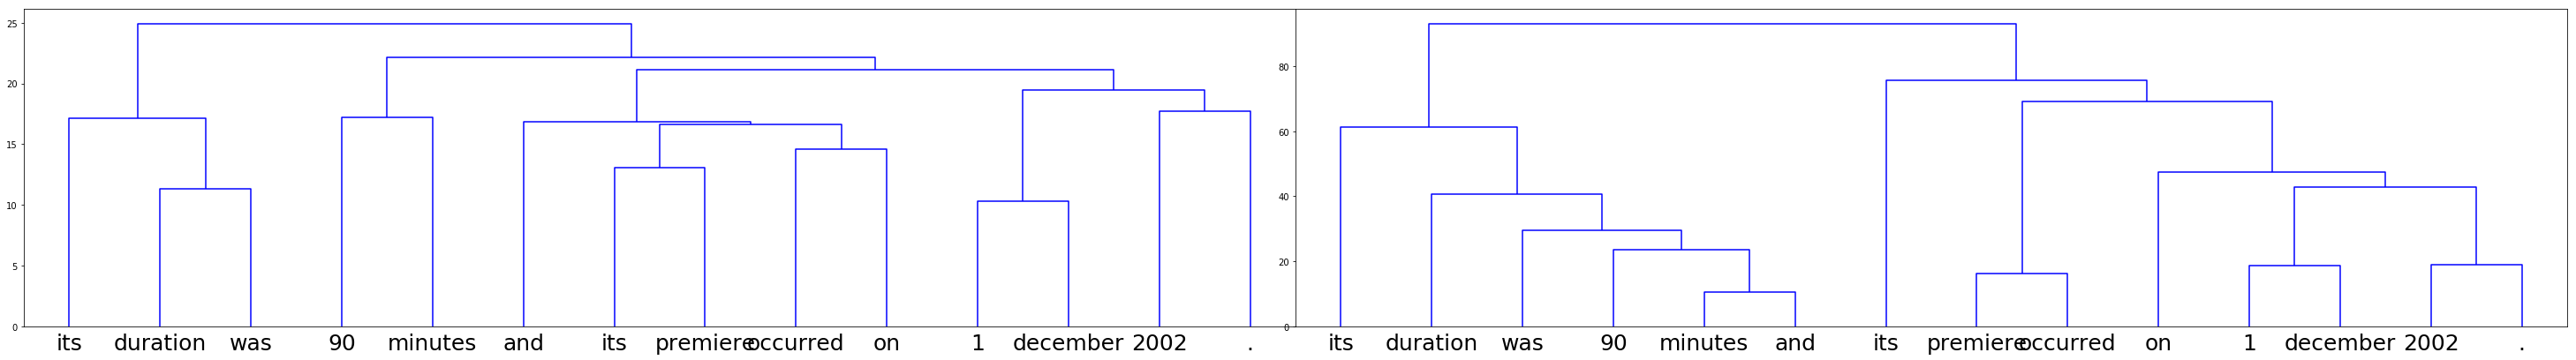

but please be careful to record exactly where such ads were originally published .


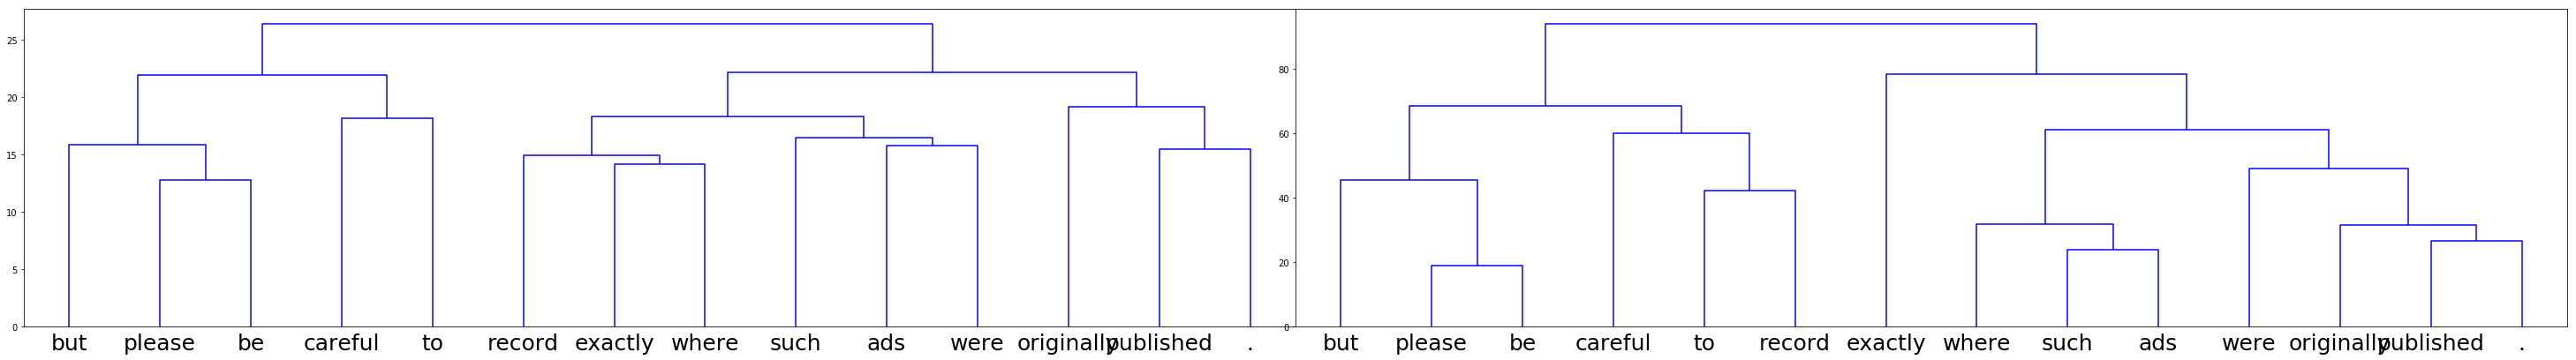

in this case , the end user may encounter a runtime error message .


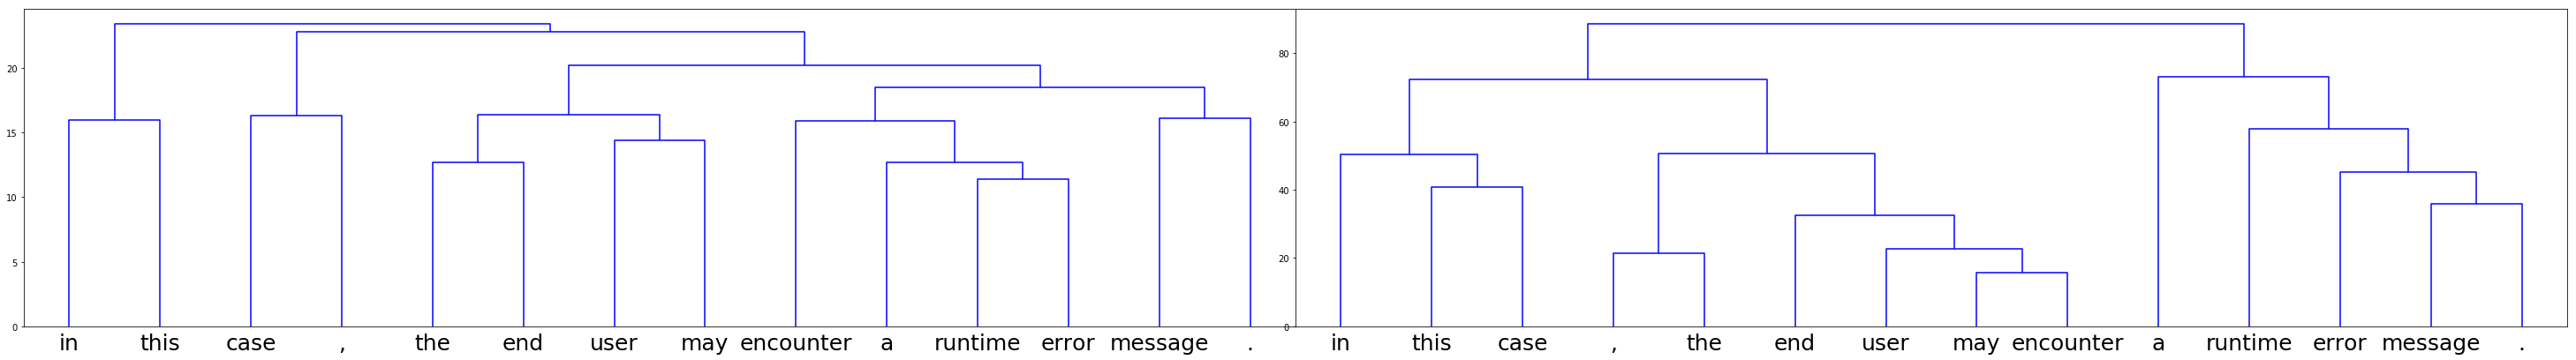

it has since been used by cornish people as a symbol of identity .


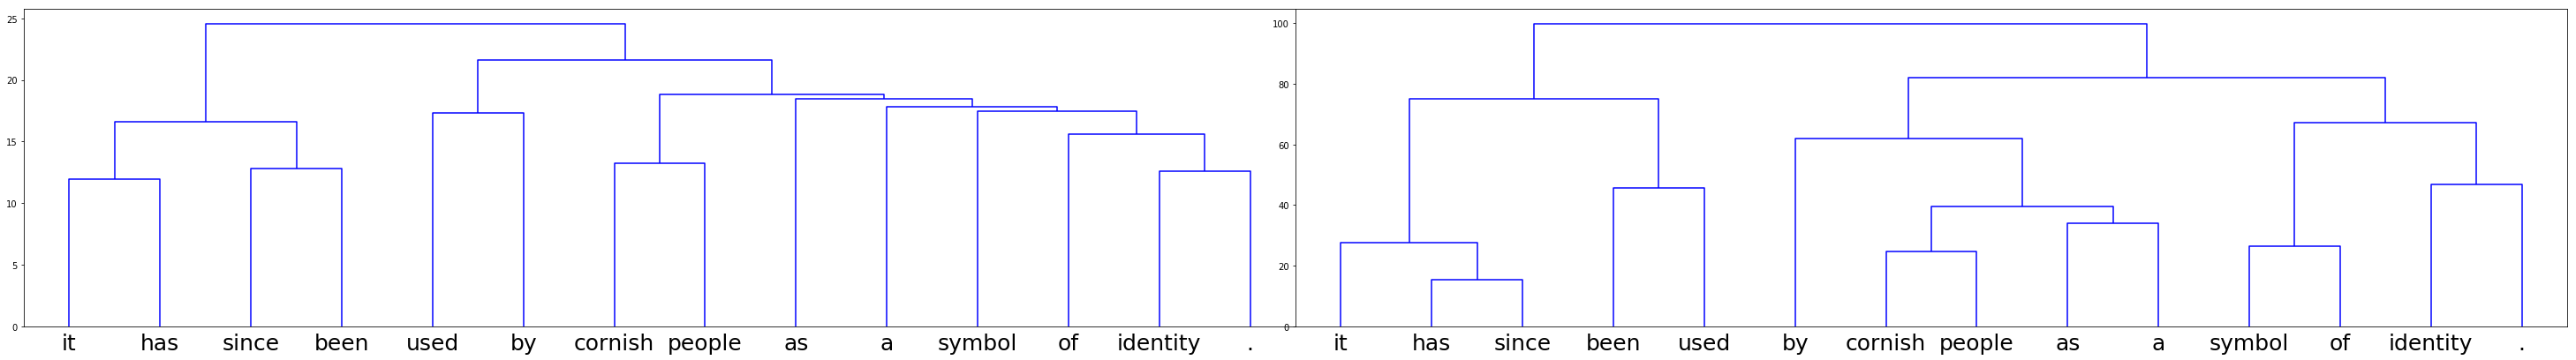

the king rushed to the spot and recovered an idol from the jungle .


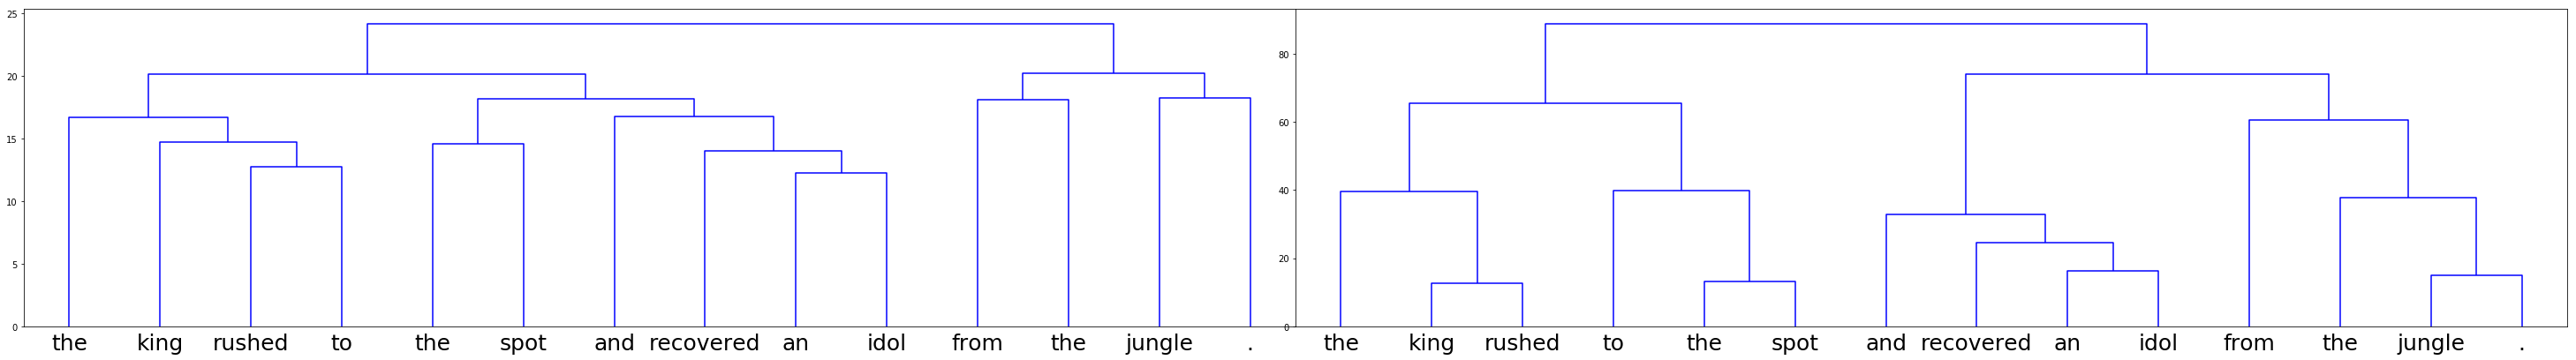

the front included nationalist groups , but it was dominated by communist partisans .


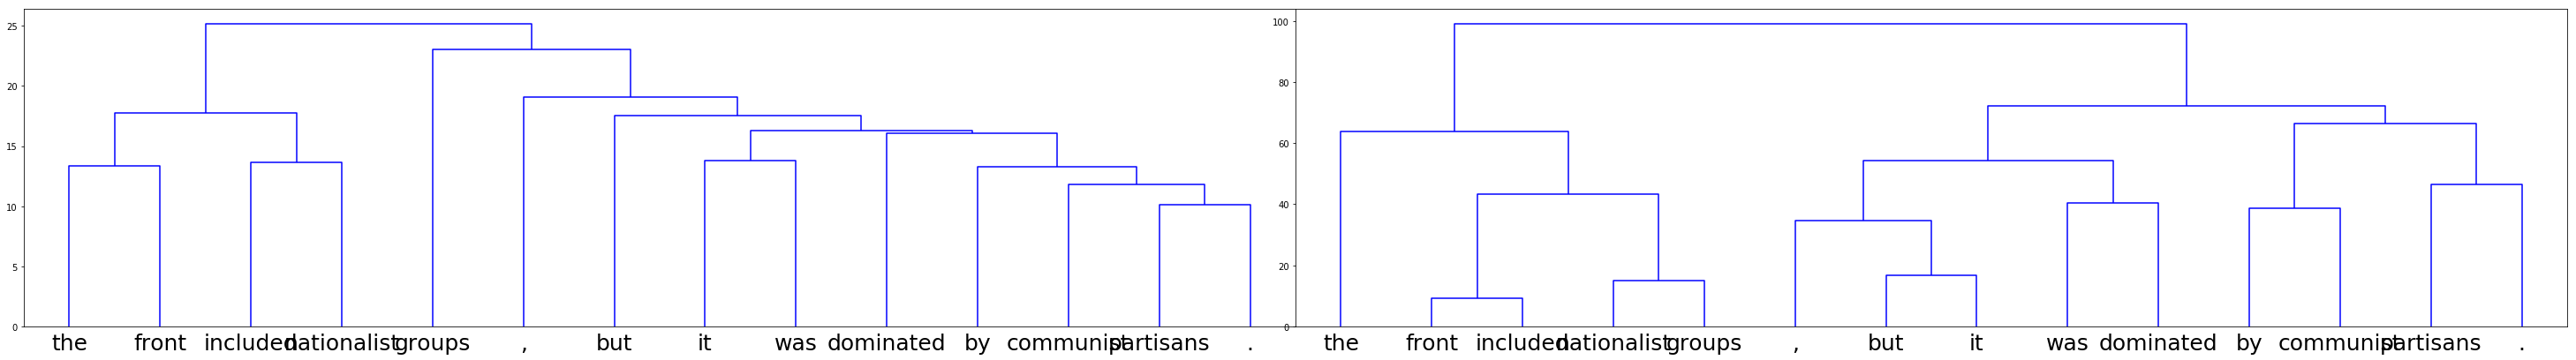

the name comes from the local indian tribe and means `` high banks .


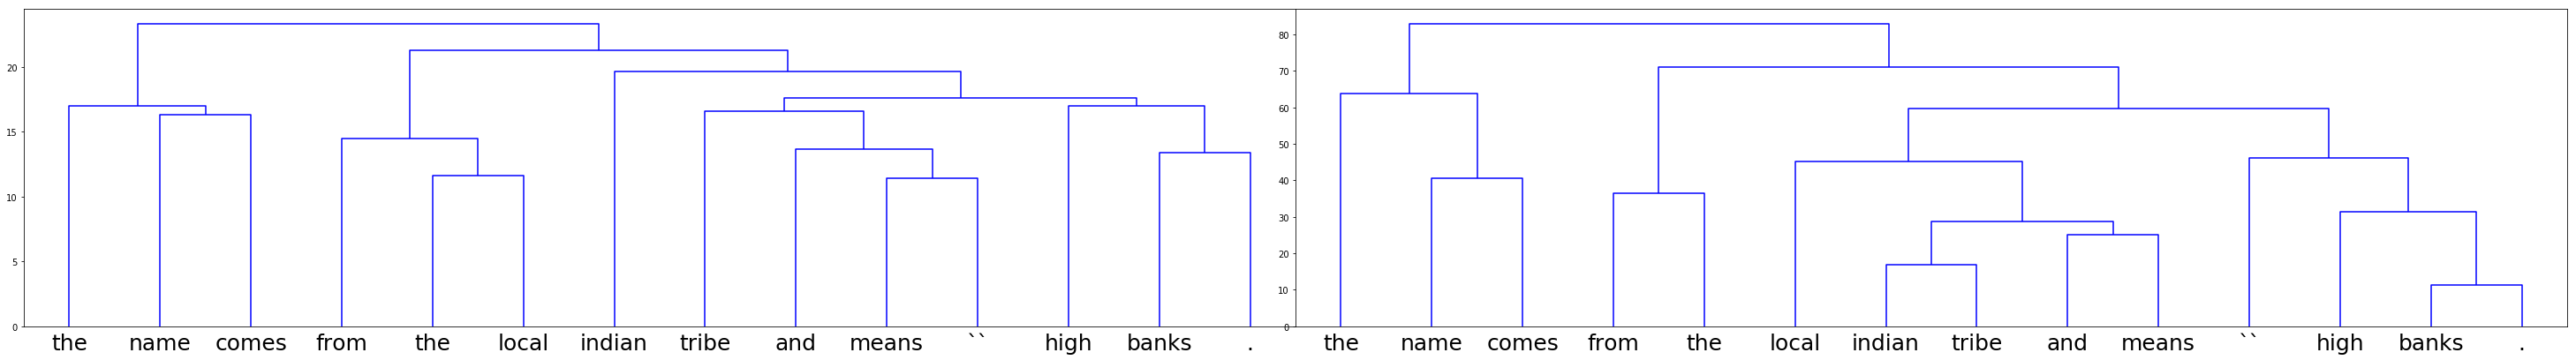

pete brown was born in reading and educated at presentation college , reading .


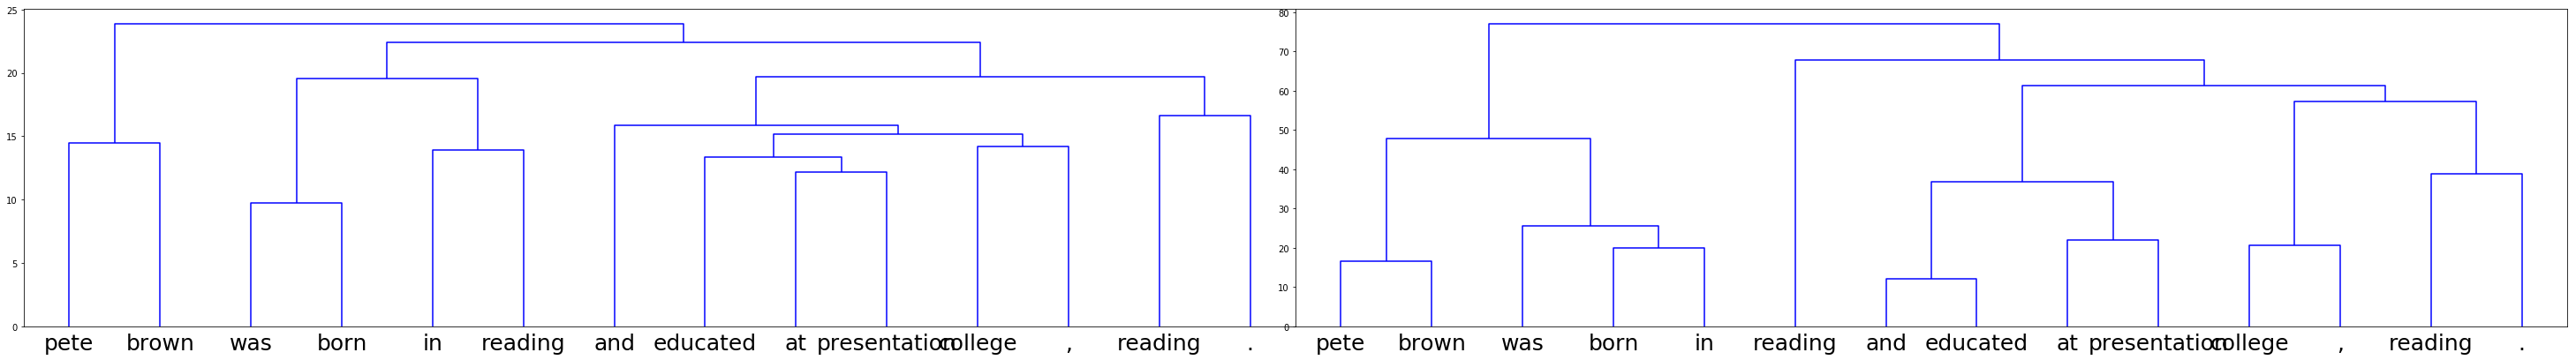

the freezing rain persisted for many hours , leading to extensive ice damage .


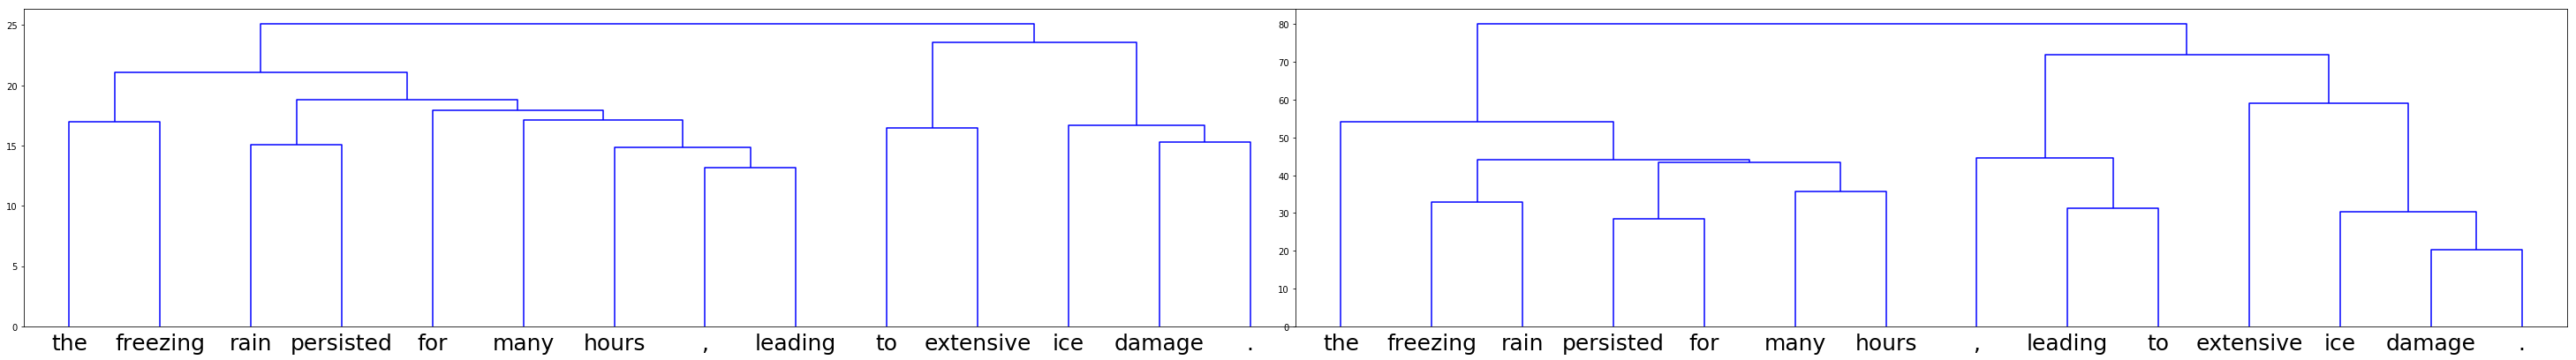

the khmer rouge is not buddhist and will not appear in this article .


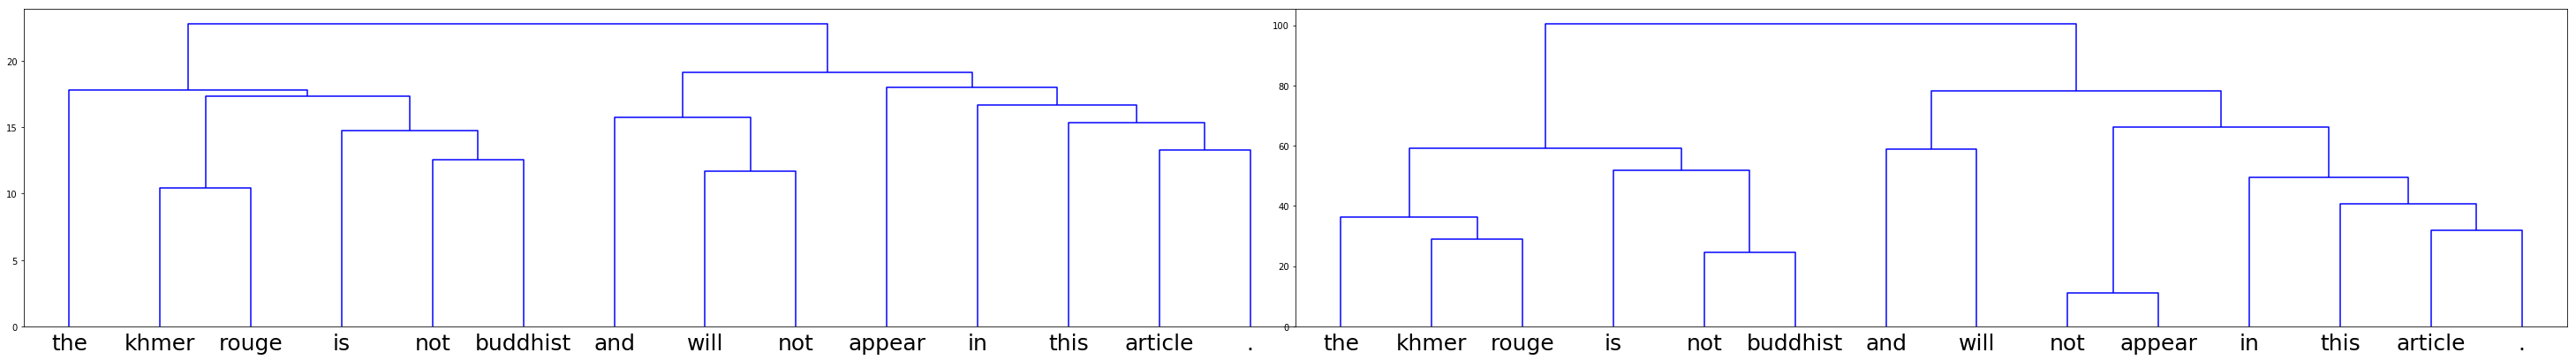

this was an enlightened way of worship in which caste distinctions were discarded .


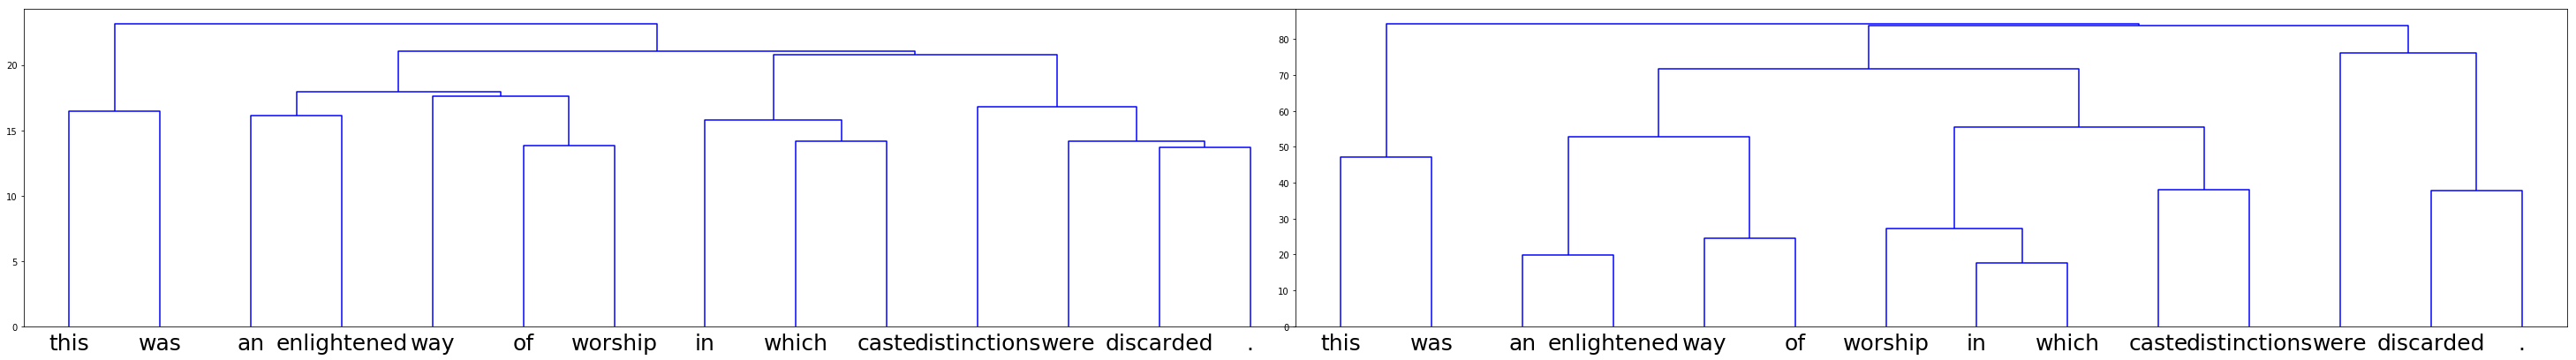

i would like to support this but the article could use some work .


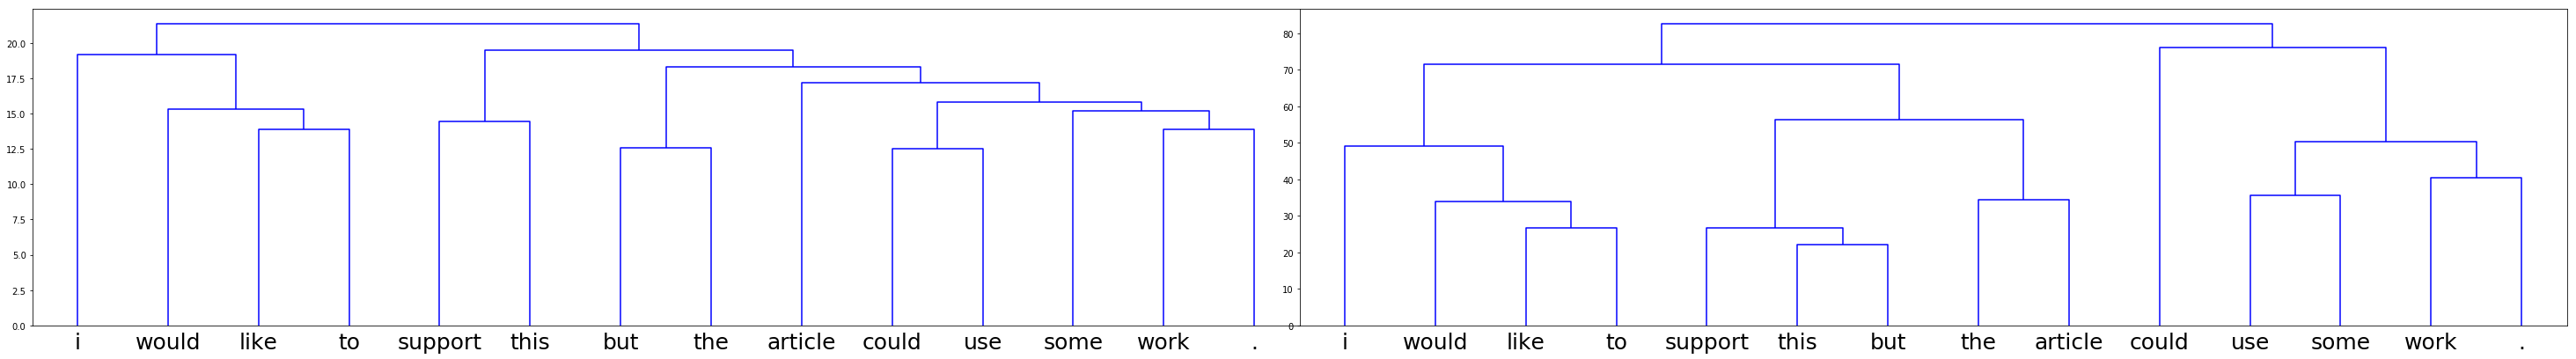

the national workers ' union is a trade union in trinidad and tobago .


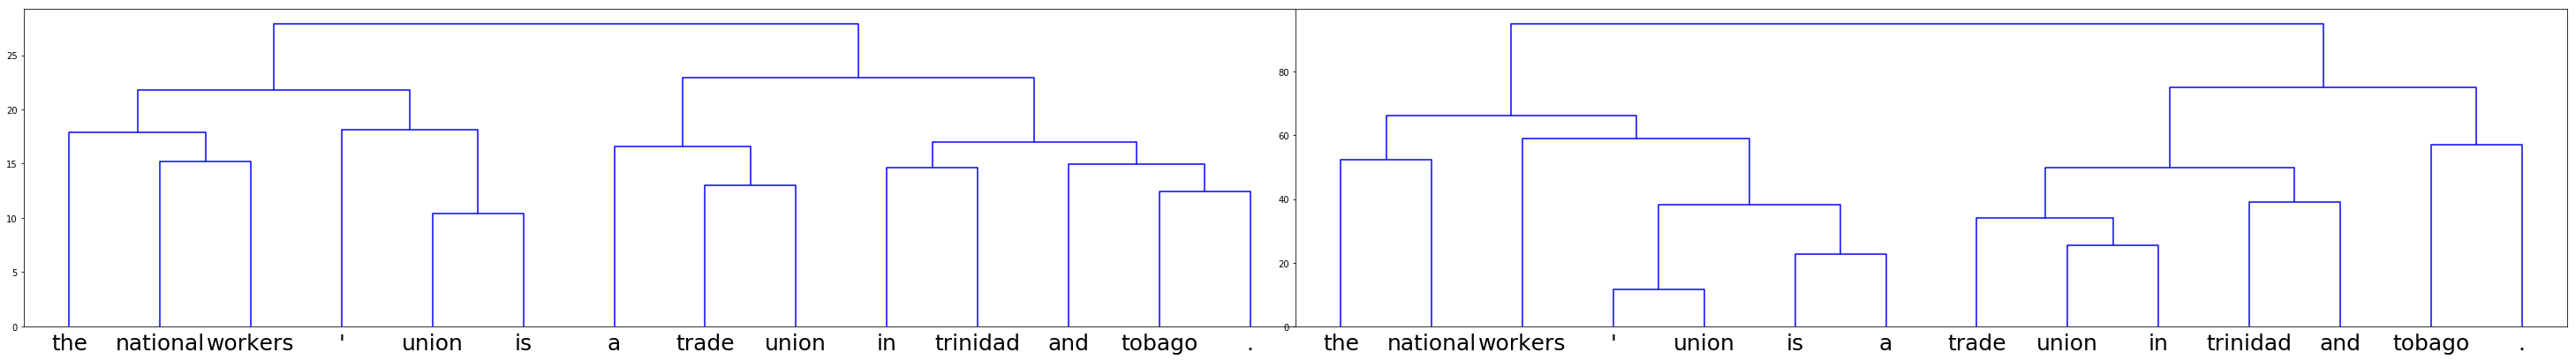

with the opening of the locks , the junction was again in use .


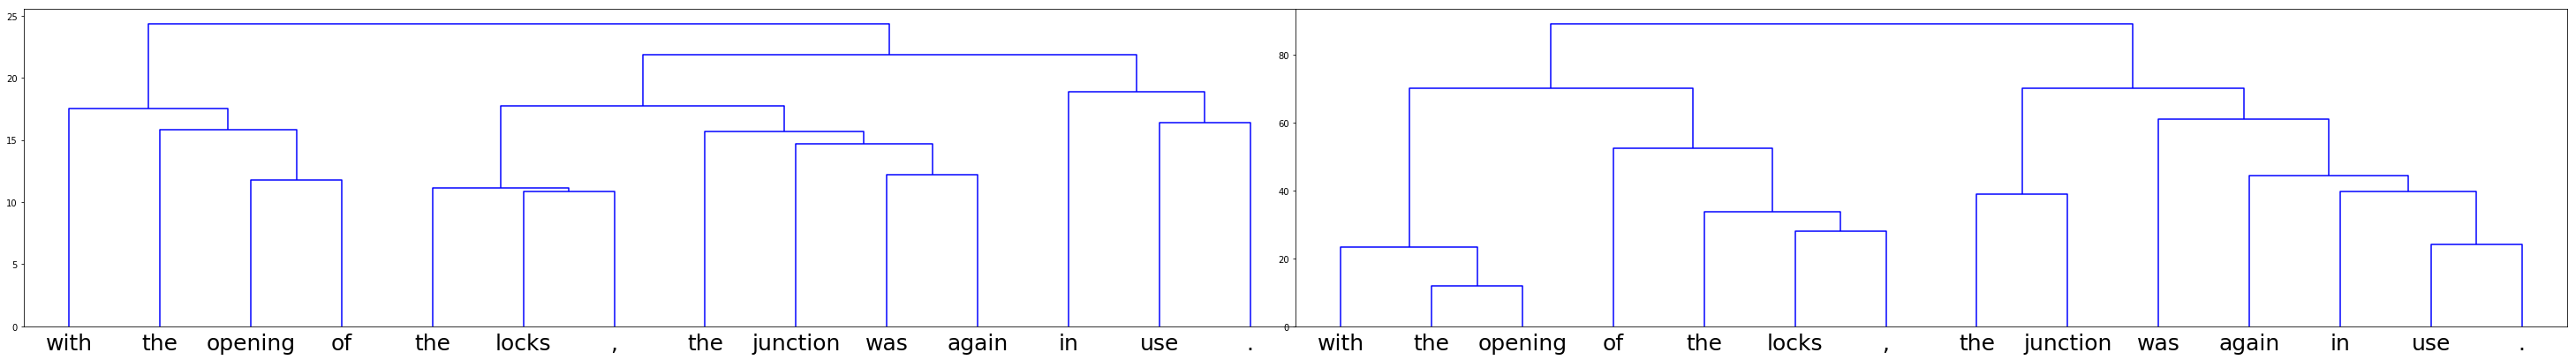

when leslie was 5 , his mother got married for a second time .


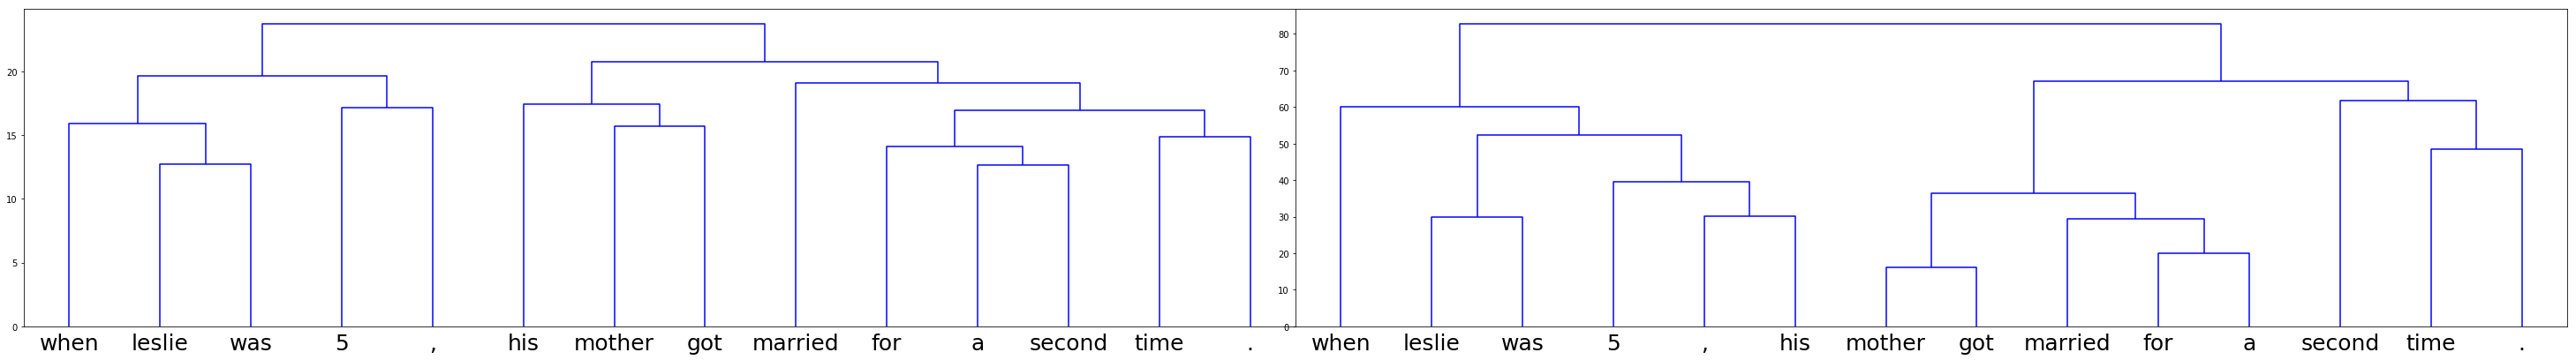

i just do n't think it 's an appropriately neutral one to use .


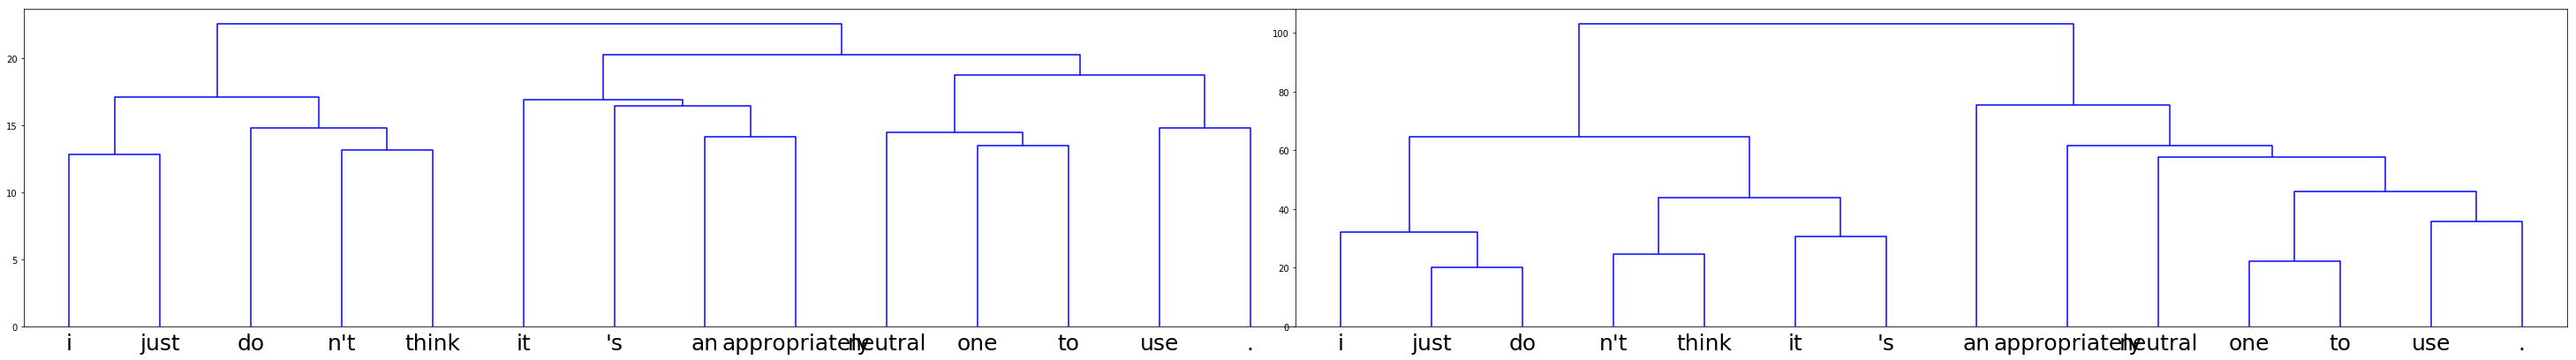

he studied at the queen street institution in scotland between 1856 and 1860 .


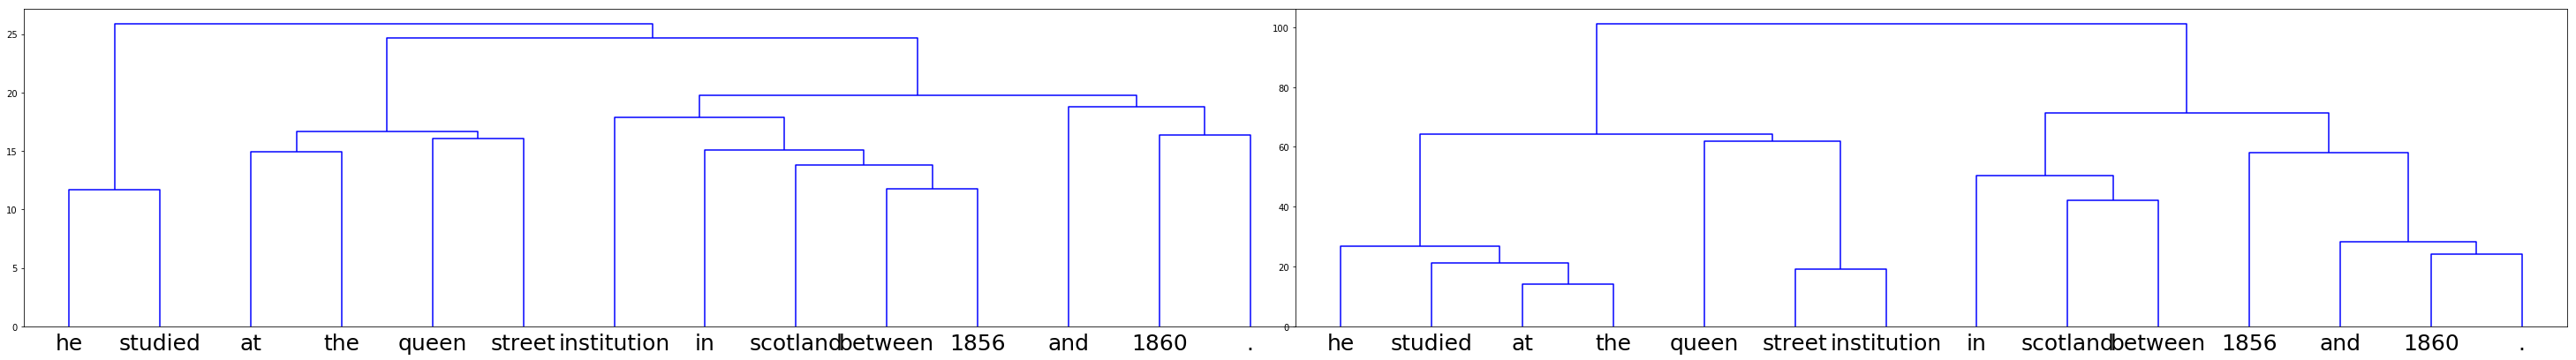

he was heavily influenced by the local jesuit community while studying in edinburgh .


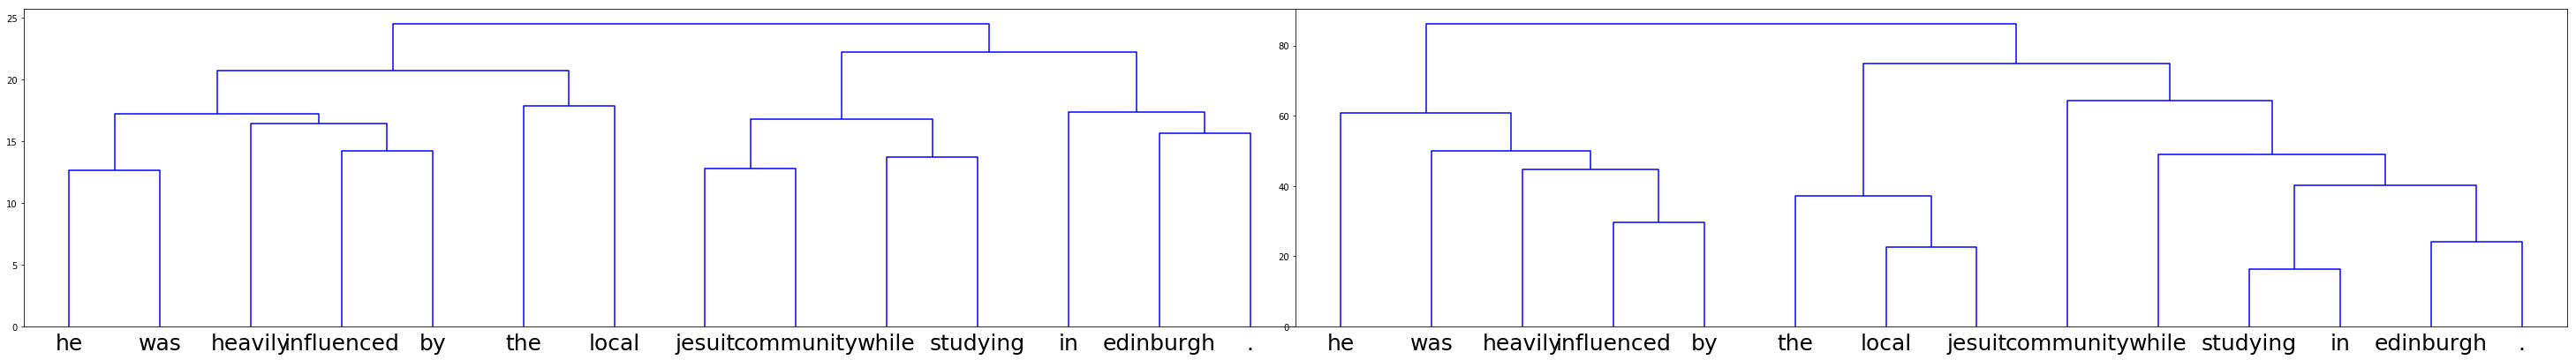

it received largely negative reviews from critics but was a box office success .


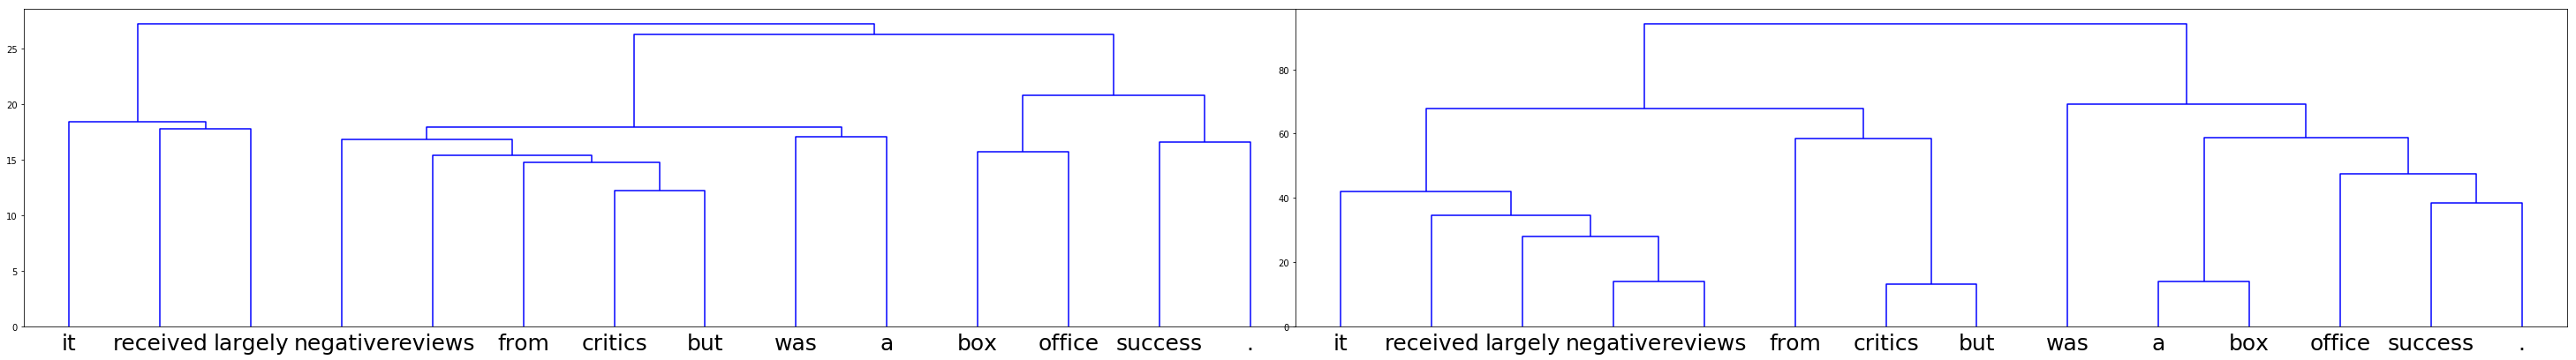

two years later , on behalf of canada , she revisited north america .


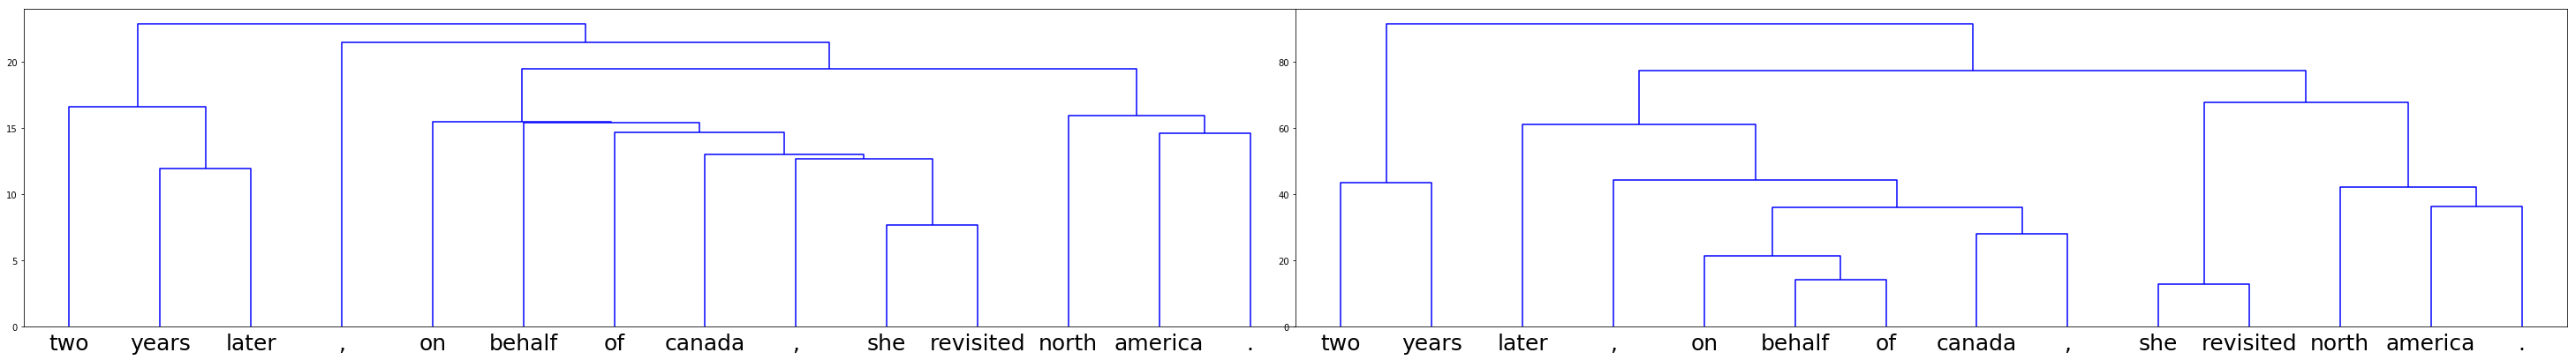

these centres cater for various needs from top brand shops to local products .


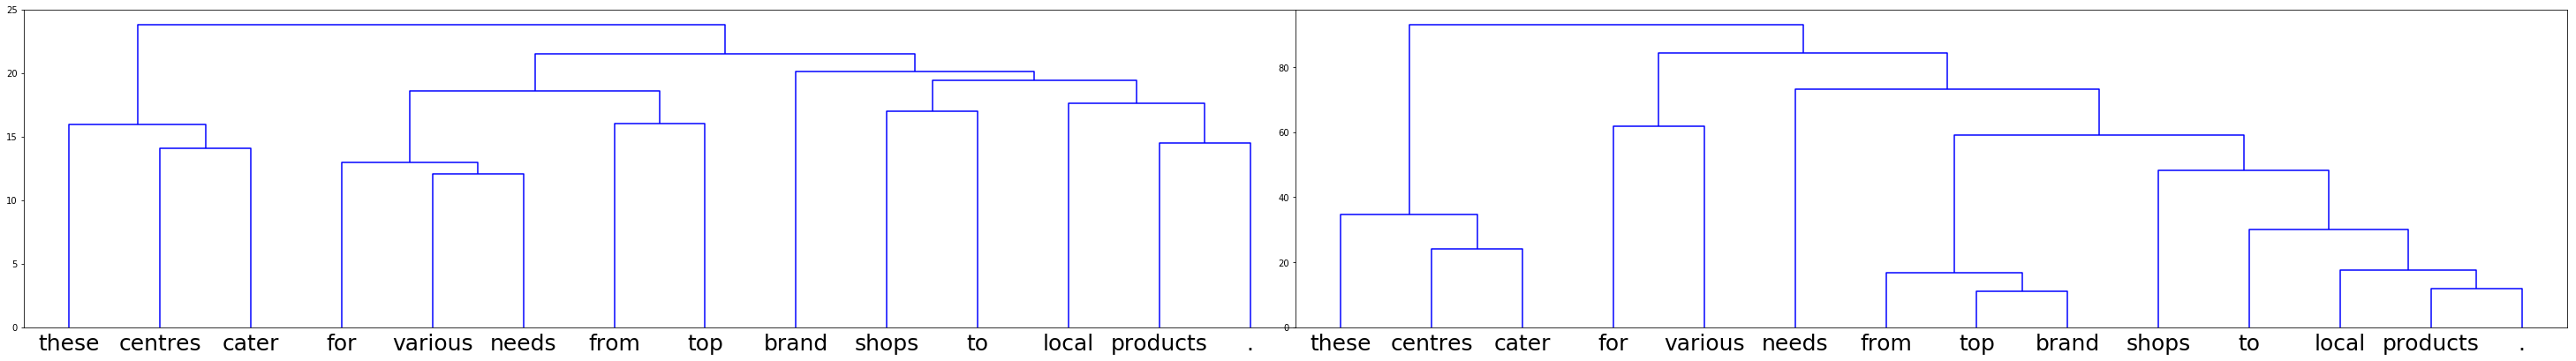

episodes are broadcast late on tuesday nights and repeated late on saturday nights .


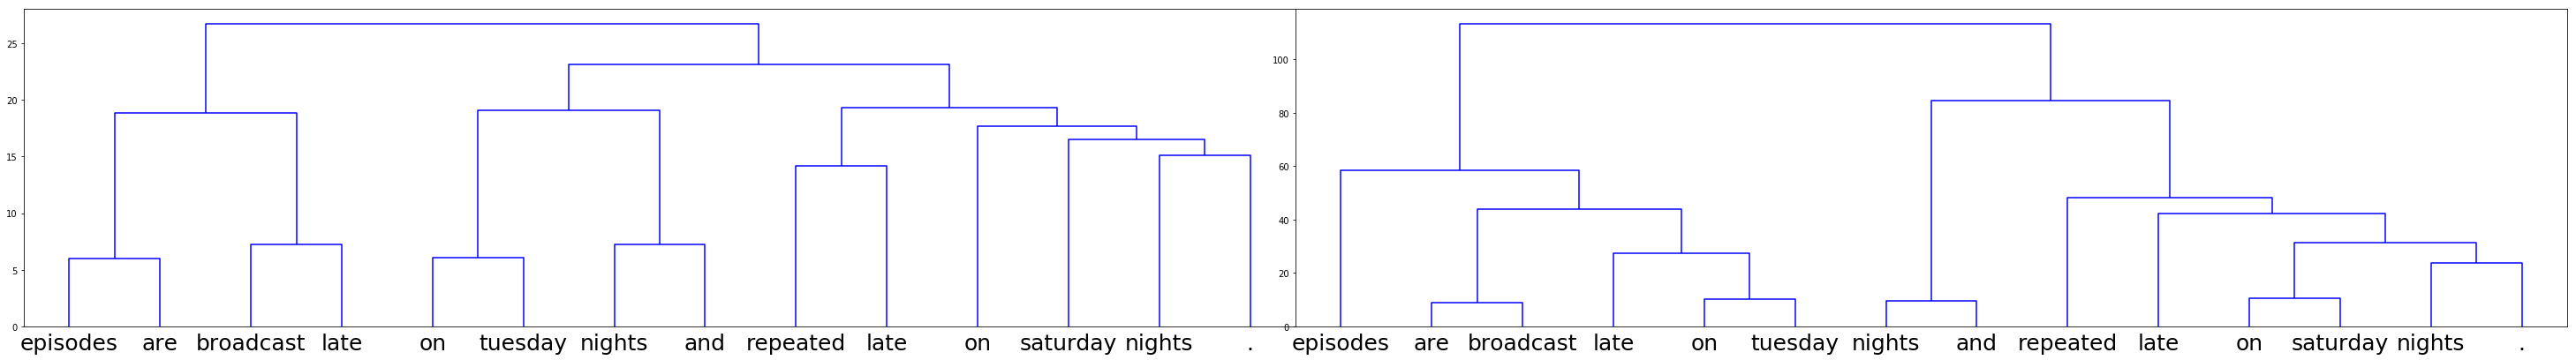

if it has value though , this may be eligible for valued pictures .


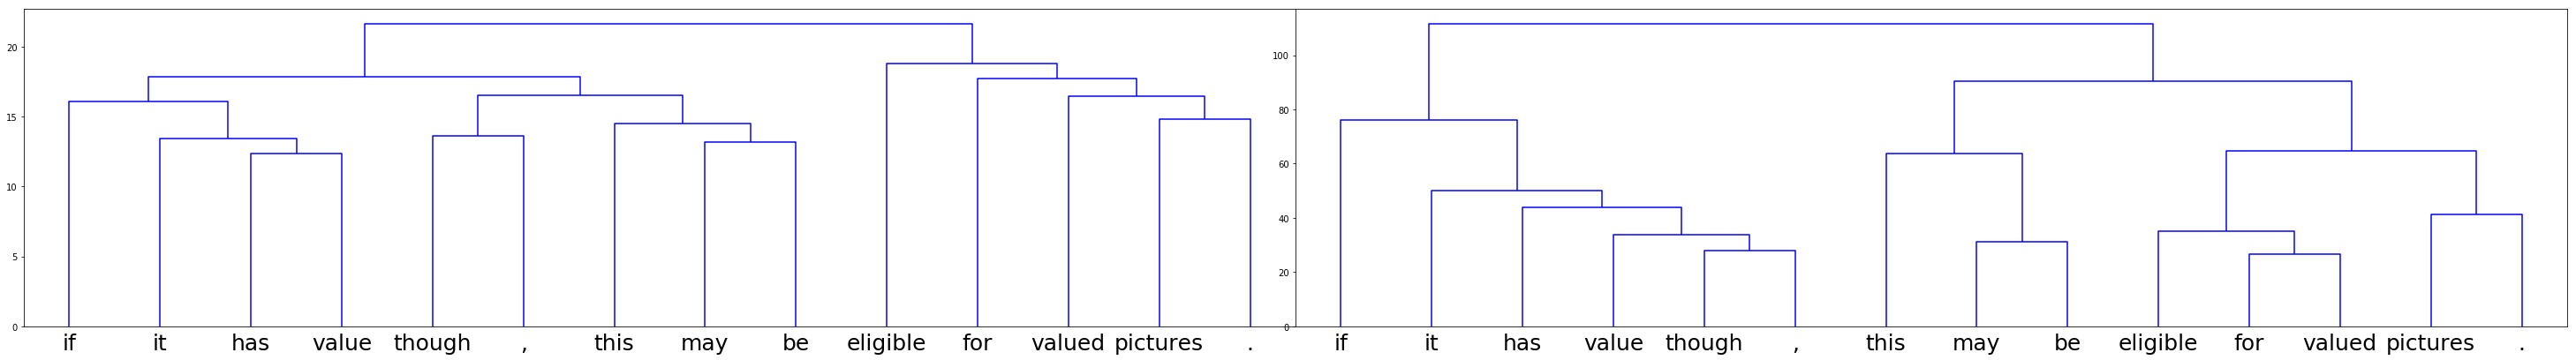

cohen attended bradley university in peoria , illinois , majoring in elementary education .


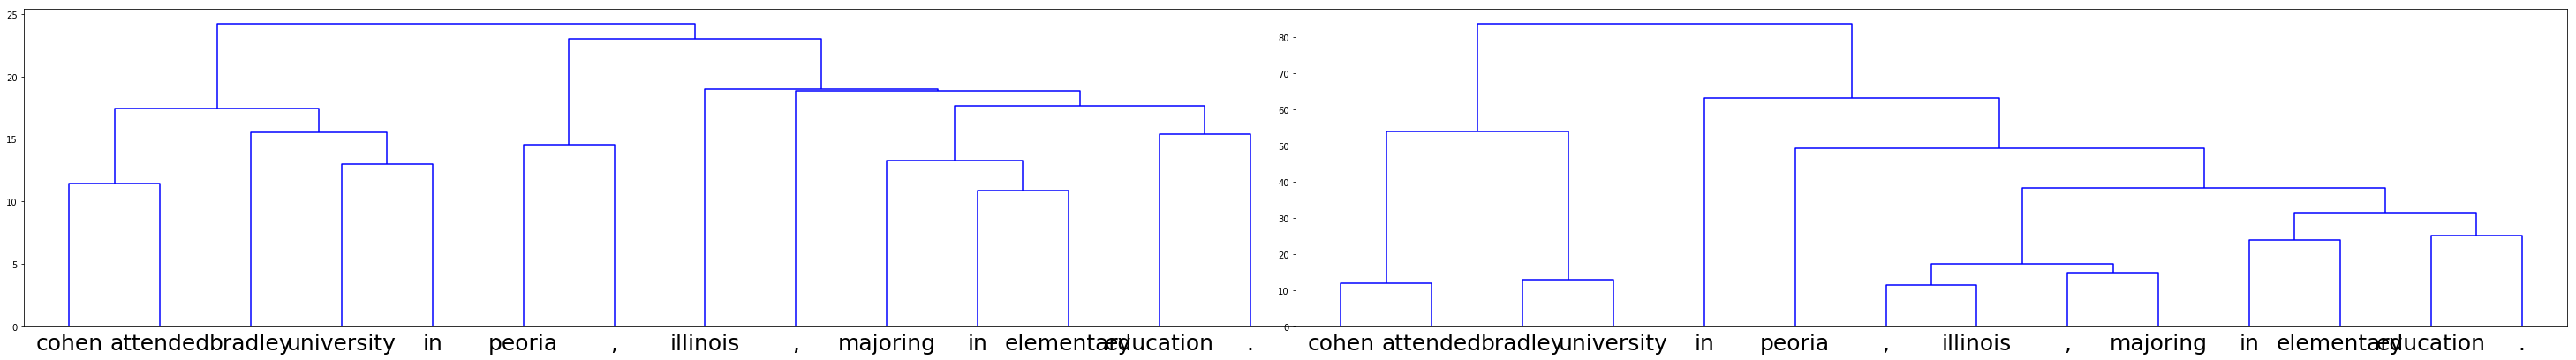

benson produced miss understood , and has been one of her songwriting collaborators .


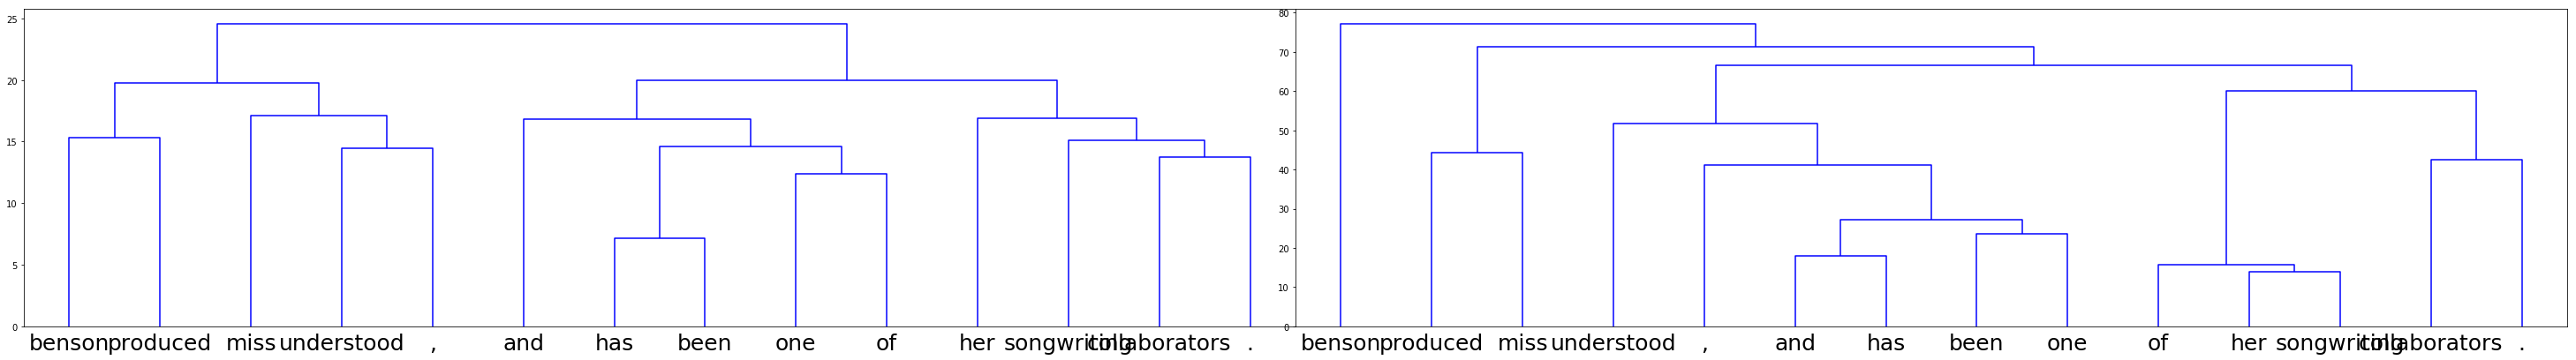

the film examines the difficulties of being both an orthodox jew and gay .


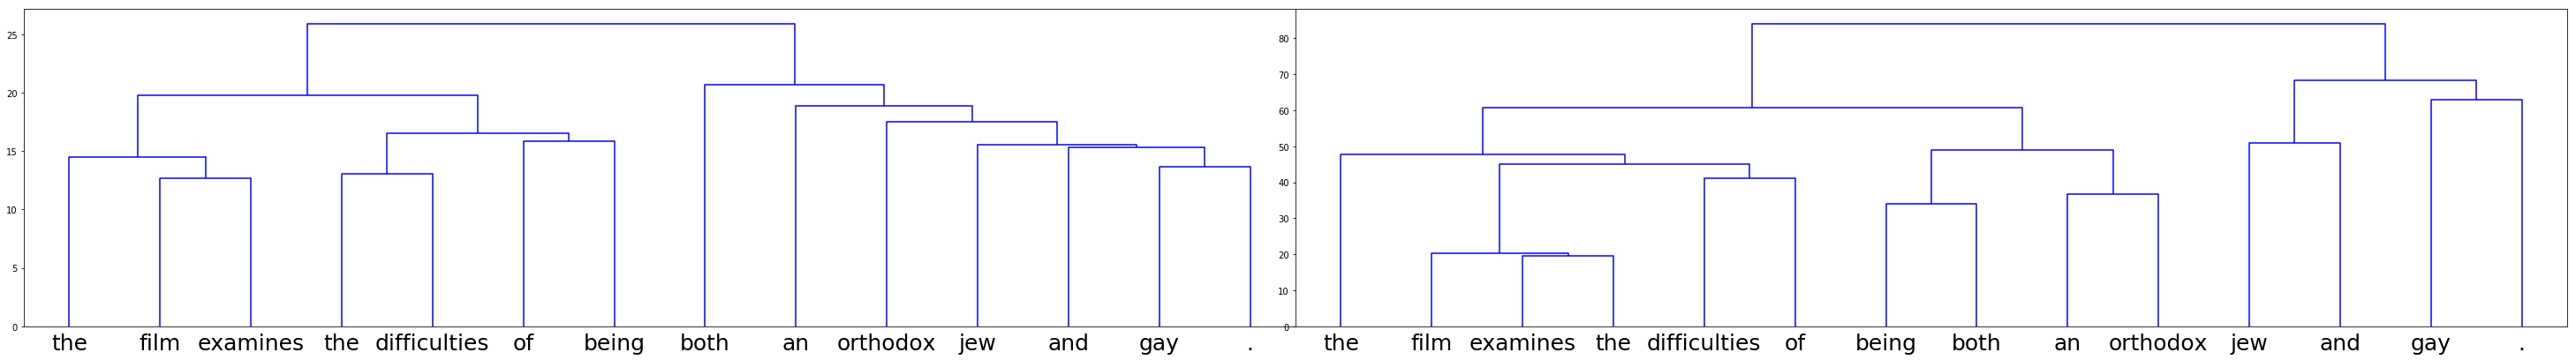

as for the last comment there , i am seeking an objective decision .


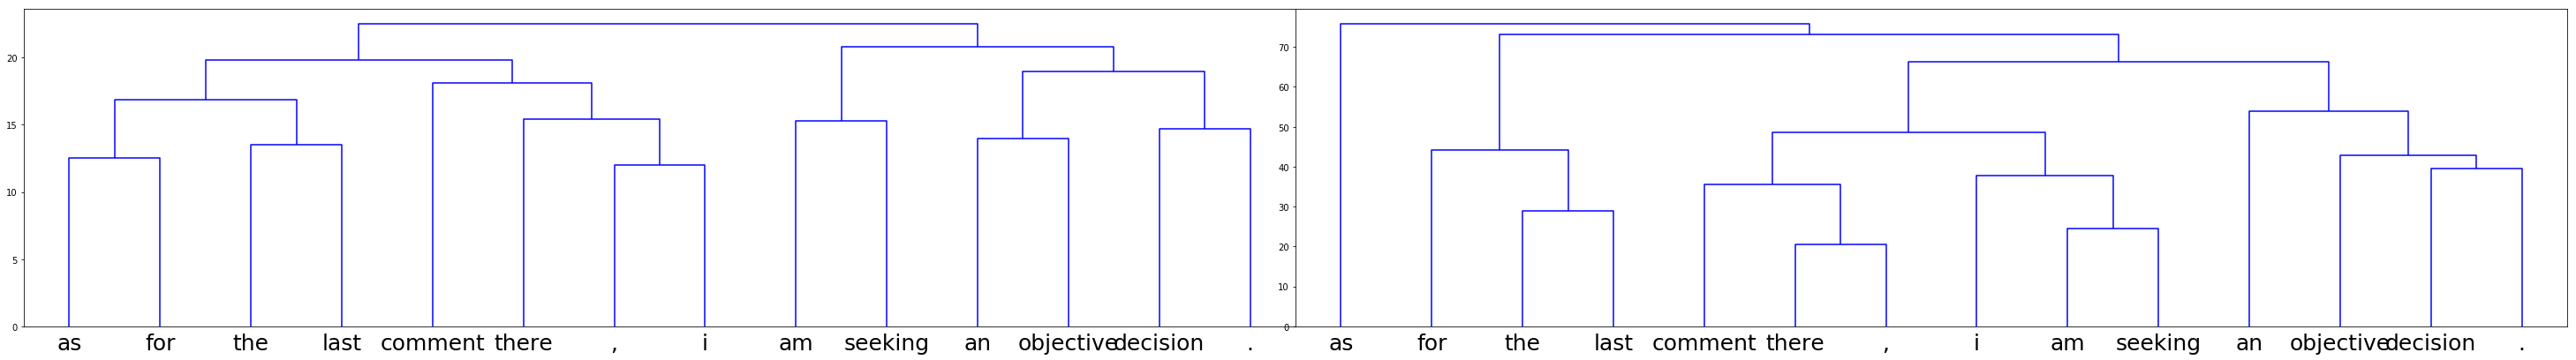

the university of washington opens in seattle , washington as the territorial university .


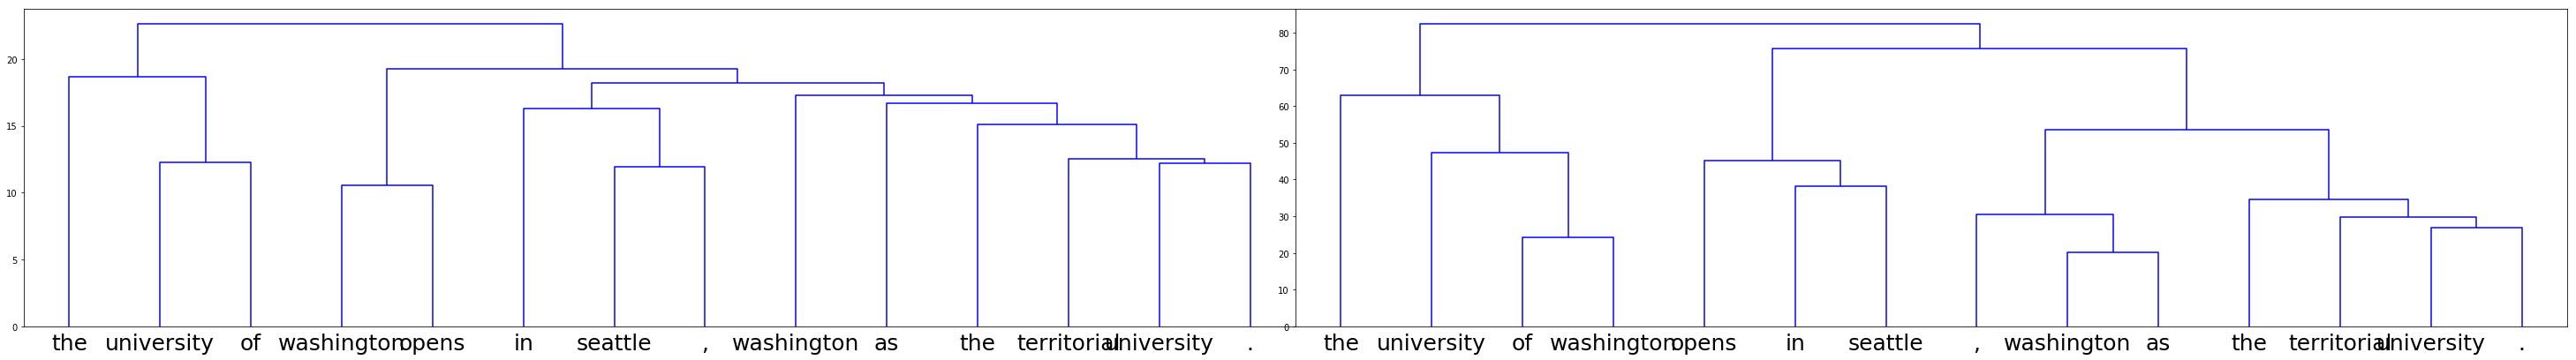

the only source given has a 2 sentence passing mention of the topic .


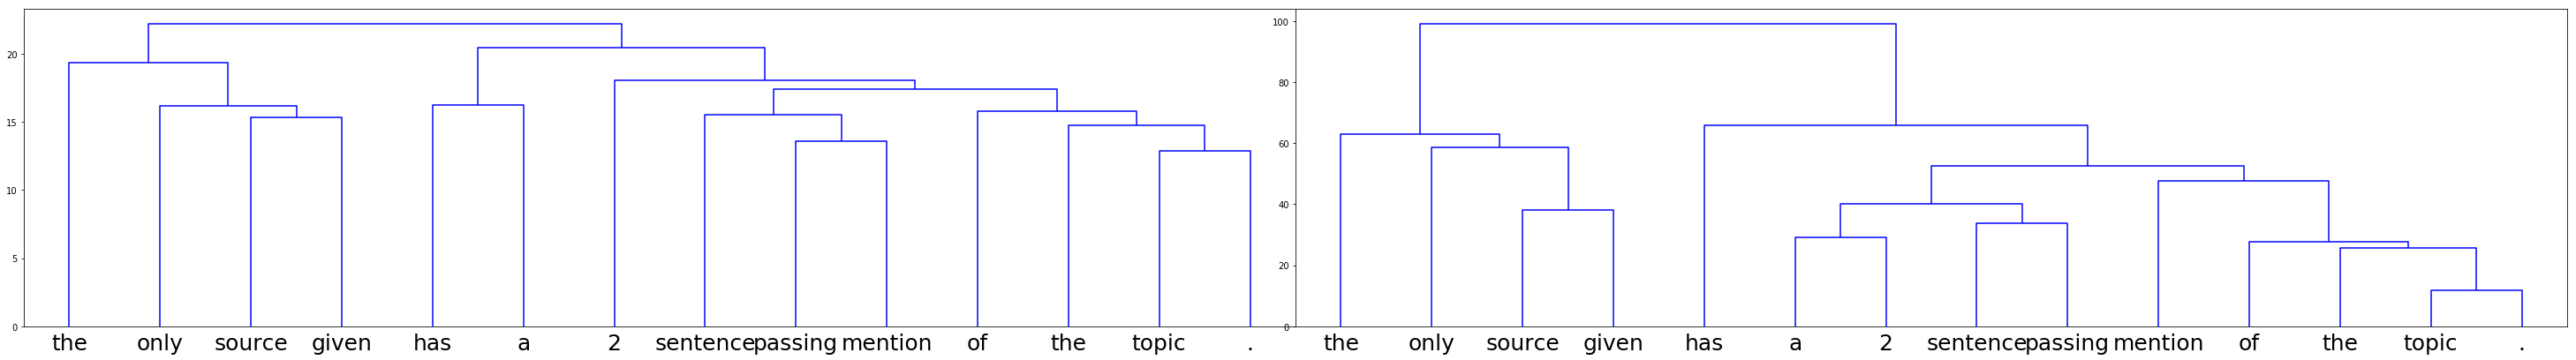

you probably would instead be shocked by the size of the death toll .


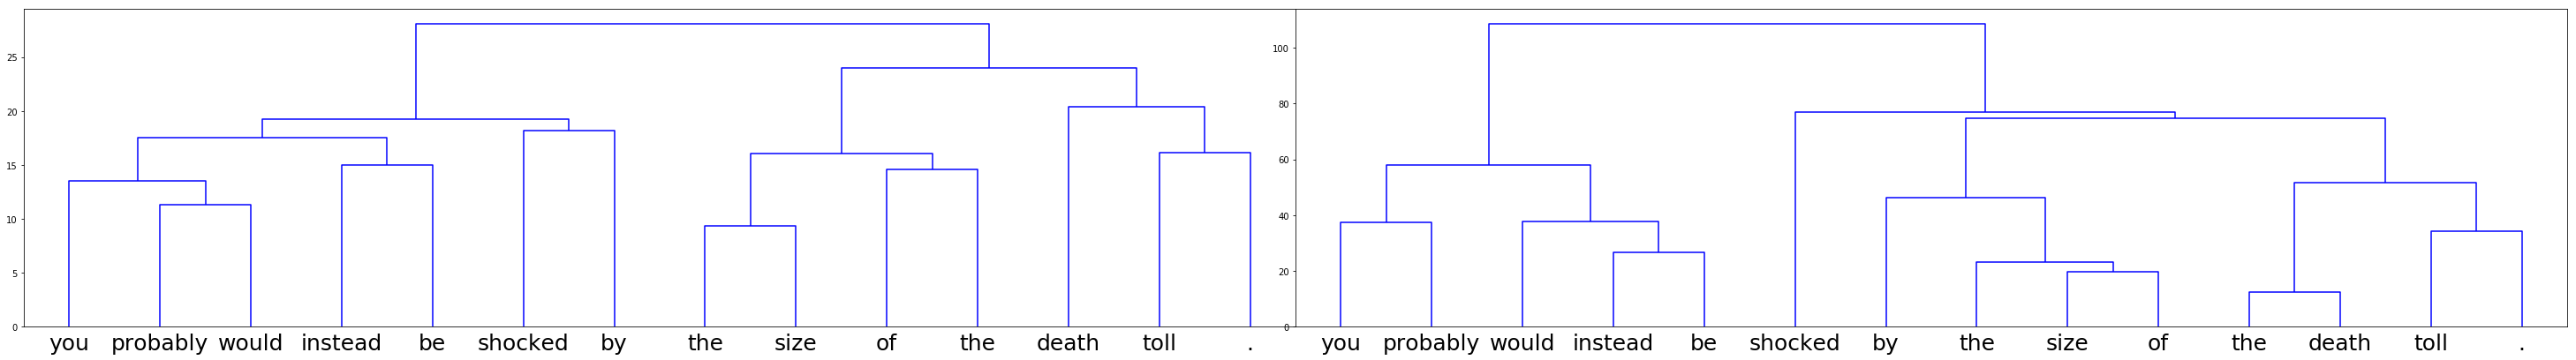

strong keep - most primary schools are not notable but this one is .


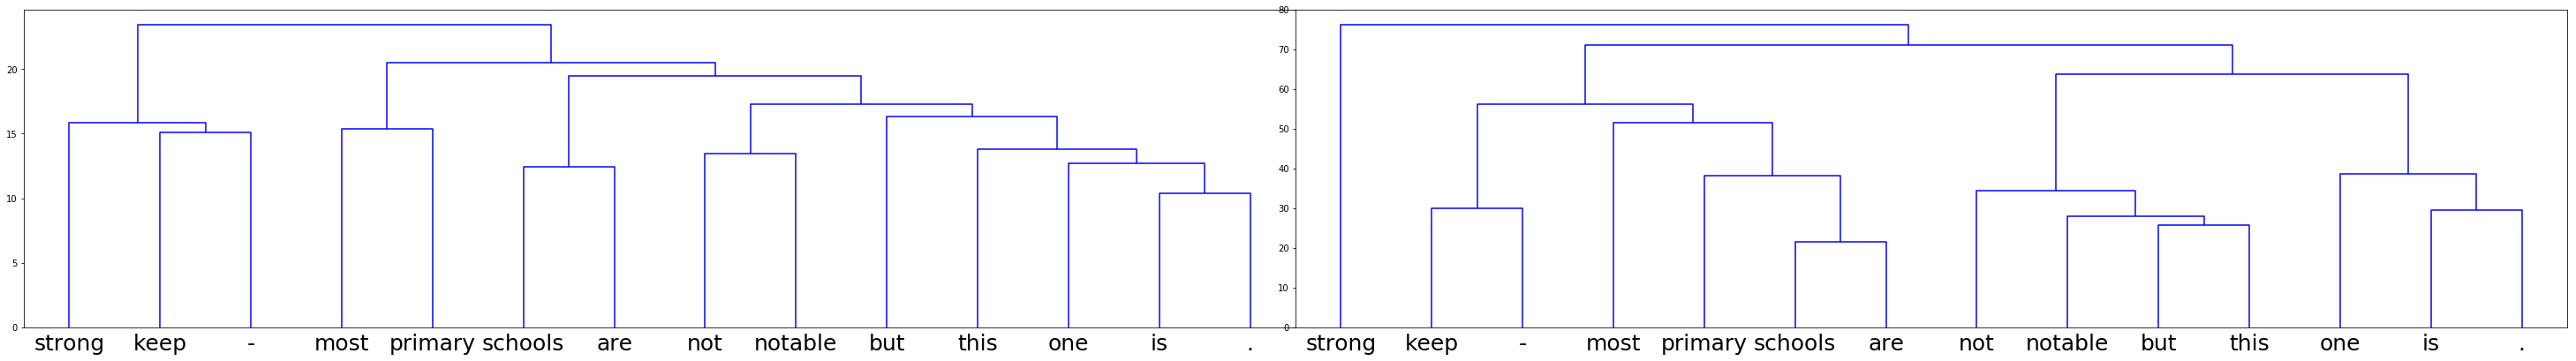

n is the only sufficient measure of whether a subject should be included .


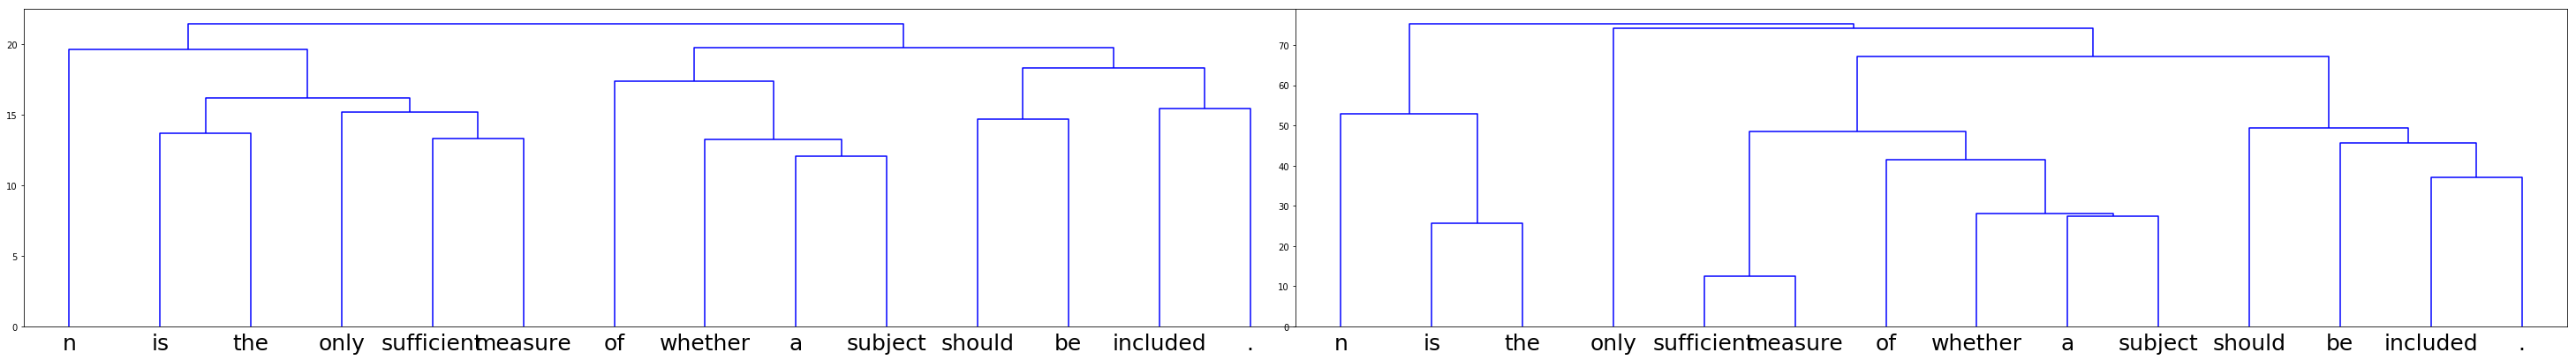

families usually had one car -- or even no car , imagine that .


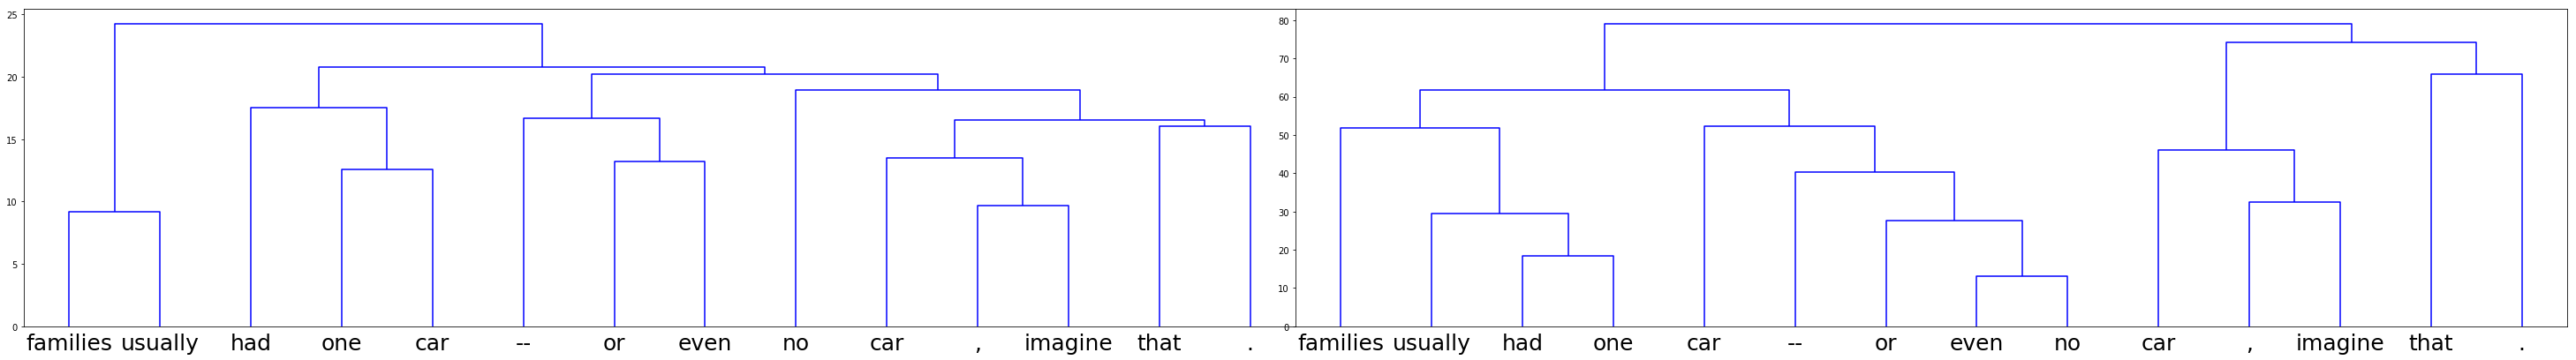

april 1 , 1906 ) was a danish geologist and explorer of greenland .


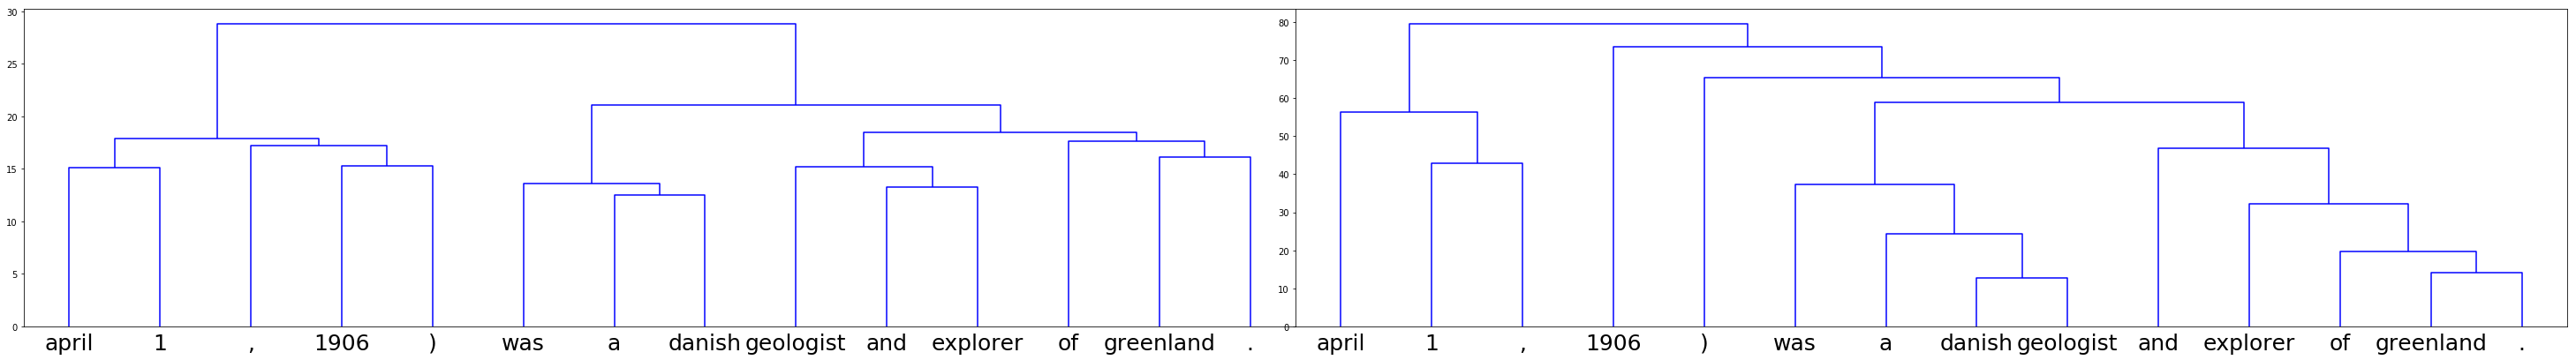

the colonial is one of the only four historic theaters left in idaho .


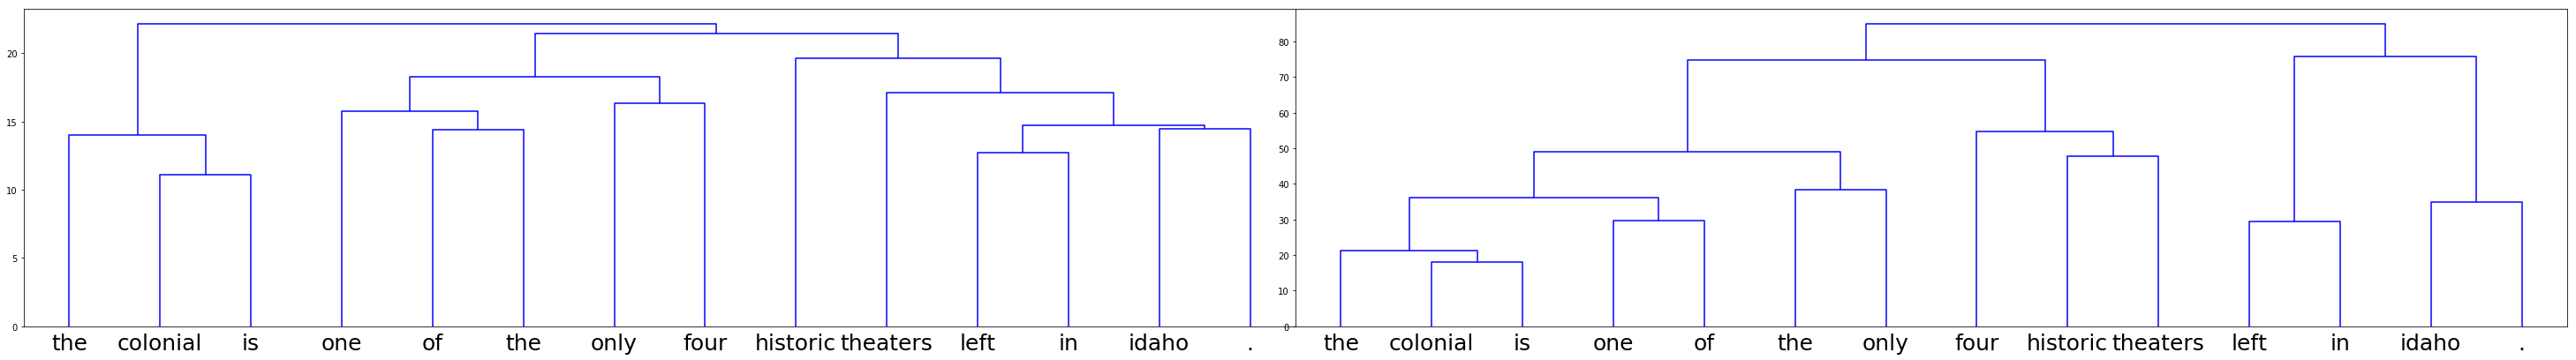

In [5]:
for i in range(num_sentences):
    
    sent_embs = embeddings["elmo_representations"][0][i]
    sent_embs_transformed = [transform(vec, network) for vec in sent_embs]
    sent_embs = sent_embs.detach().numpy()
    sent = sentences[i]
    print(" ".join(sent))
    plot_hierarchically(sent_embs, sent_embs_transformed, sent)
    
# sent_embs = embeddings["elmo_representations"][0][-1].detach().numpy()
# print(sent_embs.shape)
# print(" ".join(sent))
# plot_hierarchically(sent_embs, sent)
# plot_hierarchically(sent_embs, sent)